In [17]:
import os
import glob
import pandas as pd
from tqdm.auto import tqdm
import time
import numpy as np
import numpy.ma as ma

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

from matplotlib import pyplot as plt

# Read in the data to on dictionary of each Modal

In [3]:


sensor_list = ['act', 'acw', 'dc', 'pm']
# Test out the read in helper function
def get_subject_action(sensor, full_path):
    index = full_path.find(sensor)
    index += len(sensor)
    subject = int(full_path[index+1:index+3])
    action = int(full_path[index+4:index+6])
    if action == 4:
        if full_path.find(f"{sensor}_1") > 0:
            action = '4-1'
        else:
            action = '4-2'
        
    return (subject, str(action))

for sensor in sensor_list:
    for sensor_dir in glob.iglob('.\\data\\' + sensor ):
        print(f"On {sensor}")
        for subject_id, subject_dir in enumerate(glob.iglob(f"{sensor_dir}\\*")):
            for action_id, file in enumerate(os.listdir(subject_dir)):
                full_path = f"{subject_dir}\\{file}"
                #print(full_path, get_subject_action(sensor, full_path))
                
test_str = '.\\data\\act\\01\\01_act_1.csv'

On act
On acw
On dc
On pm


(1, '1')

In [5]:
%%time
total_data = {
    'act': None,
    'acw': None,
    'dc': None,
    'pm': None,
}


headers = {
    'act': ['times', 'X', 'Y', 'Z'],
    'acw': ['times', 'X', 'Y', 'Z'],
    'dc': ['times'],
    'pm': ['times']
}
for i in range(1,513):
    headers['pm'].append(f"sensor_{i}")
for i in range(1,193):
    headers['dc'].append(f"sensor_{i}")

actions = ['1', '2', '3', '4-1', '4-2', '5', '6', '7']

sensor_list = ['act', 'acw', 'dc', 'pm']
#sensor_list = ['acw']

# there are 956 files in our dataset
i = 0

pbar = tqdm(desc="load data", total=956)
for sensor in sensor_list:
    for sensor_dir in glob.iglob('.\\data\\' + sensor ):
        #print(f"On {sensor}")
        for subject_id, subject_dir in enumerate(glob.iglob(f"{sensor_dir}\\*")):
            for action_id, file in enumerate(os.listdir(subject_dir)):
                full_path = f"{subject_dir}\\{file}"
                df_tmp = pd.read_csv(full_path, names=headers[sensor])
                i+=1
                pbar.update(1)
                subject, action = get_subject_action(sensor, full_path)
                # add one to make it match the given format
                df_tmp['subject'] = subject
                df_tmp['action'] = action
                if total_data[sensor] is None:
                    total_data[sensor] = df_tmp
                else:
                    total_data[sensor] = pd.concat([total_data[sensor], df_tmp])

load data:   0%|          | 0/956 [00:00<?, ?it/s]

Wall time: 1min 21s


## Data Exploration
### Pressure Mat


In [36]:
pm_image_cols = [f"sensor_{i}" for i in range(1, 513)]
total_data['pm']
imgs = total_data['pm'][pm_image_cols].to_numpy().reshape(202682, 32, 16)

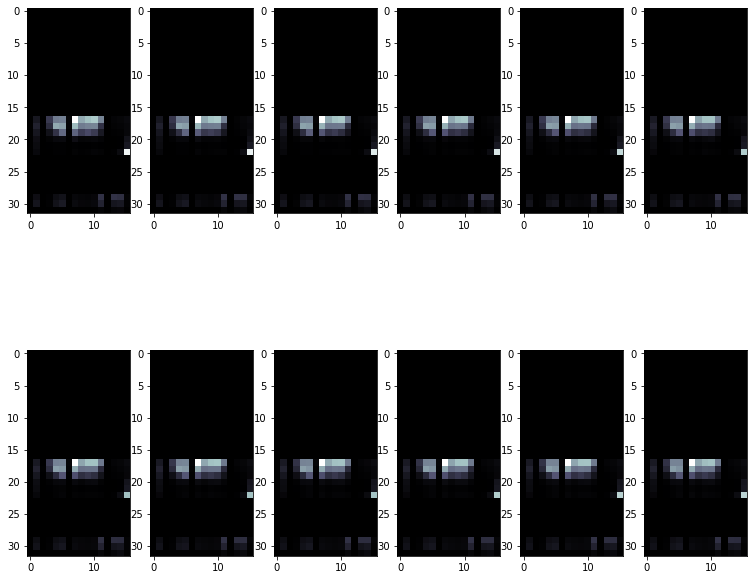

In [37]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6, skip=0, step=1):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row *2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[(i * step) + skip],cmap='bone')
    plt.show()
plot_gallery(imgs, [i for i  in range(-5,-1)], 32,16,n_row=2, n_col=6, skip=10000, step=1)

## Depth Camera

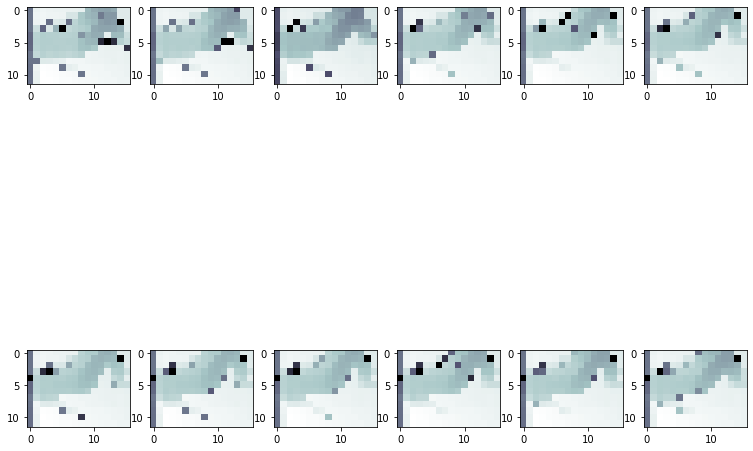

In [44]:
dc_image_cols = [f"sensor_{i}" for i in range(1, 193)]
total_data['dc']
imgs = total_data['dc'][dc_image_cols].to_numpy().reshape(140694 , 12, 16)
plot_gallery(imgs, [i for i  in range(-5,-1)], 32,16,n_row=2, n_col=6, skip=10000, step=1)

## Wrist accerlometer

In [97]:
total_data['acw']

times         X         Y         Z  subject action
0     2018-11-08 11:34:51.474000  0.125000 -0.046875  0.906250        1      1
1     2018-11-08 11:34:51.485000  0.109375 -0.062500  0.906250        1      1
2     2018-11-08 11:34:51.495000  0.109375 -0.062500  0.906250        1      1
3     2018-11-08 11:34:51.505000  0.125000 -0.062500  0.906250        1      1
4     2018-11-08 11:34:51.516000  0.125000 -0.062500  0.906250        1      1
...                          ...       ...       ...       ...      ...    ...
6009  2019-03-26 16:45:51.675000 -0.296875 -0.640625  0.593750       30      7
6010  2019-03-26 16:45:51.685000 -0.296875 -0.640625  0.593750       30      7
6011  2019-03-26 16:45:51.696000 -0.312500 -0.640625  0.593750       30      7
6012  2019-03-26 16:45:51.706000 -0.312500 -0.625000  0.593750       30      7
6013  2019-03-26 16:45:51.717000 -0.296875 -0.625000  0.609375       30      7

[1313695 rows x 6 columns]

In [176]:
def plot_acc_data(df, subject, action, title=""):
    plt.figure(figsize=(100, 40))
    arr = df.to_numpy()
    arr =  arr[arr[:,5] == action]
    arr =  arr[arr[:,4] == subject]
    plt.plot(range(0,len(arr)),arr[:,1])
    plt.plot(range(0,len(arr)),arr[:,2])
    plt.plot(range(0,len(arr)),arr[:,3])
    plt.title(title,fontsize = 120)
    plt.show()

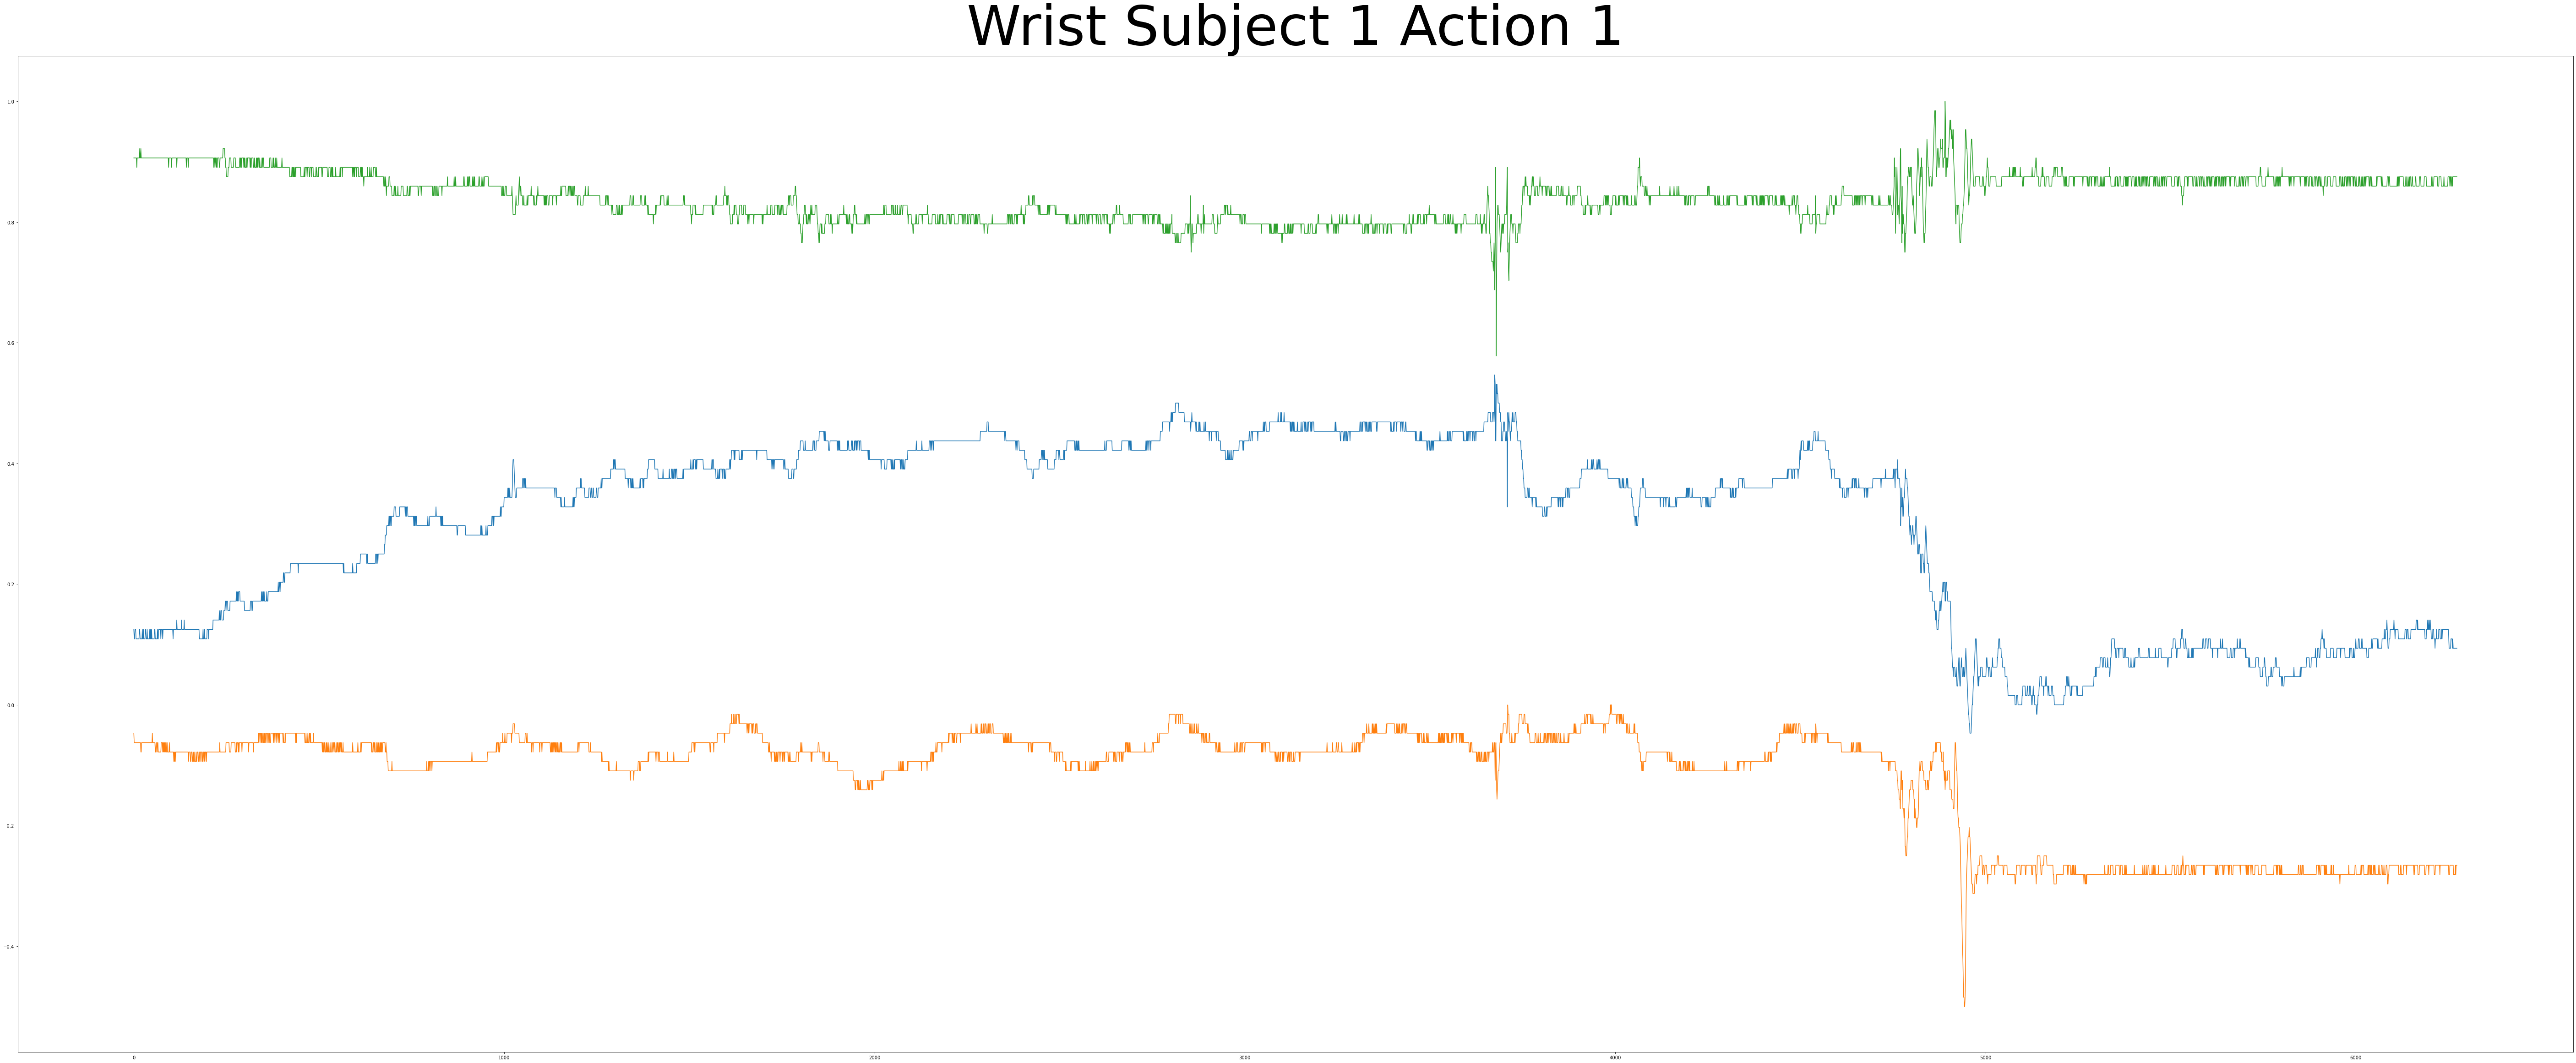

In [177]:
plot_acc_data(total_data['acw'], 1, '1', "Wrist Subject 1 Action 1")

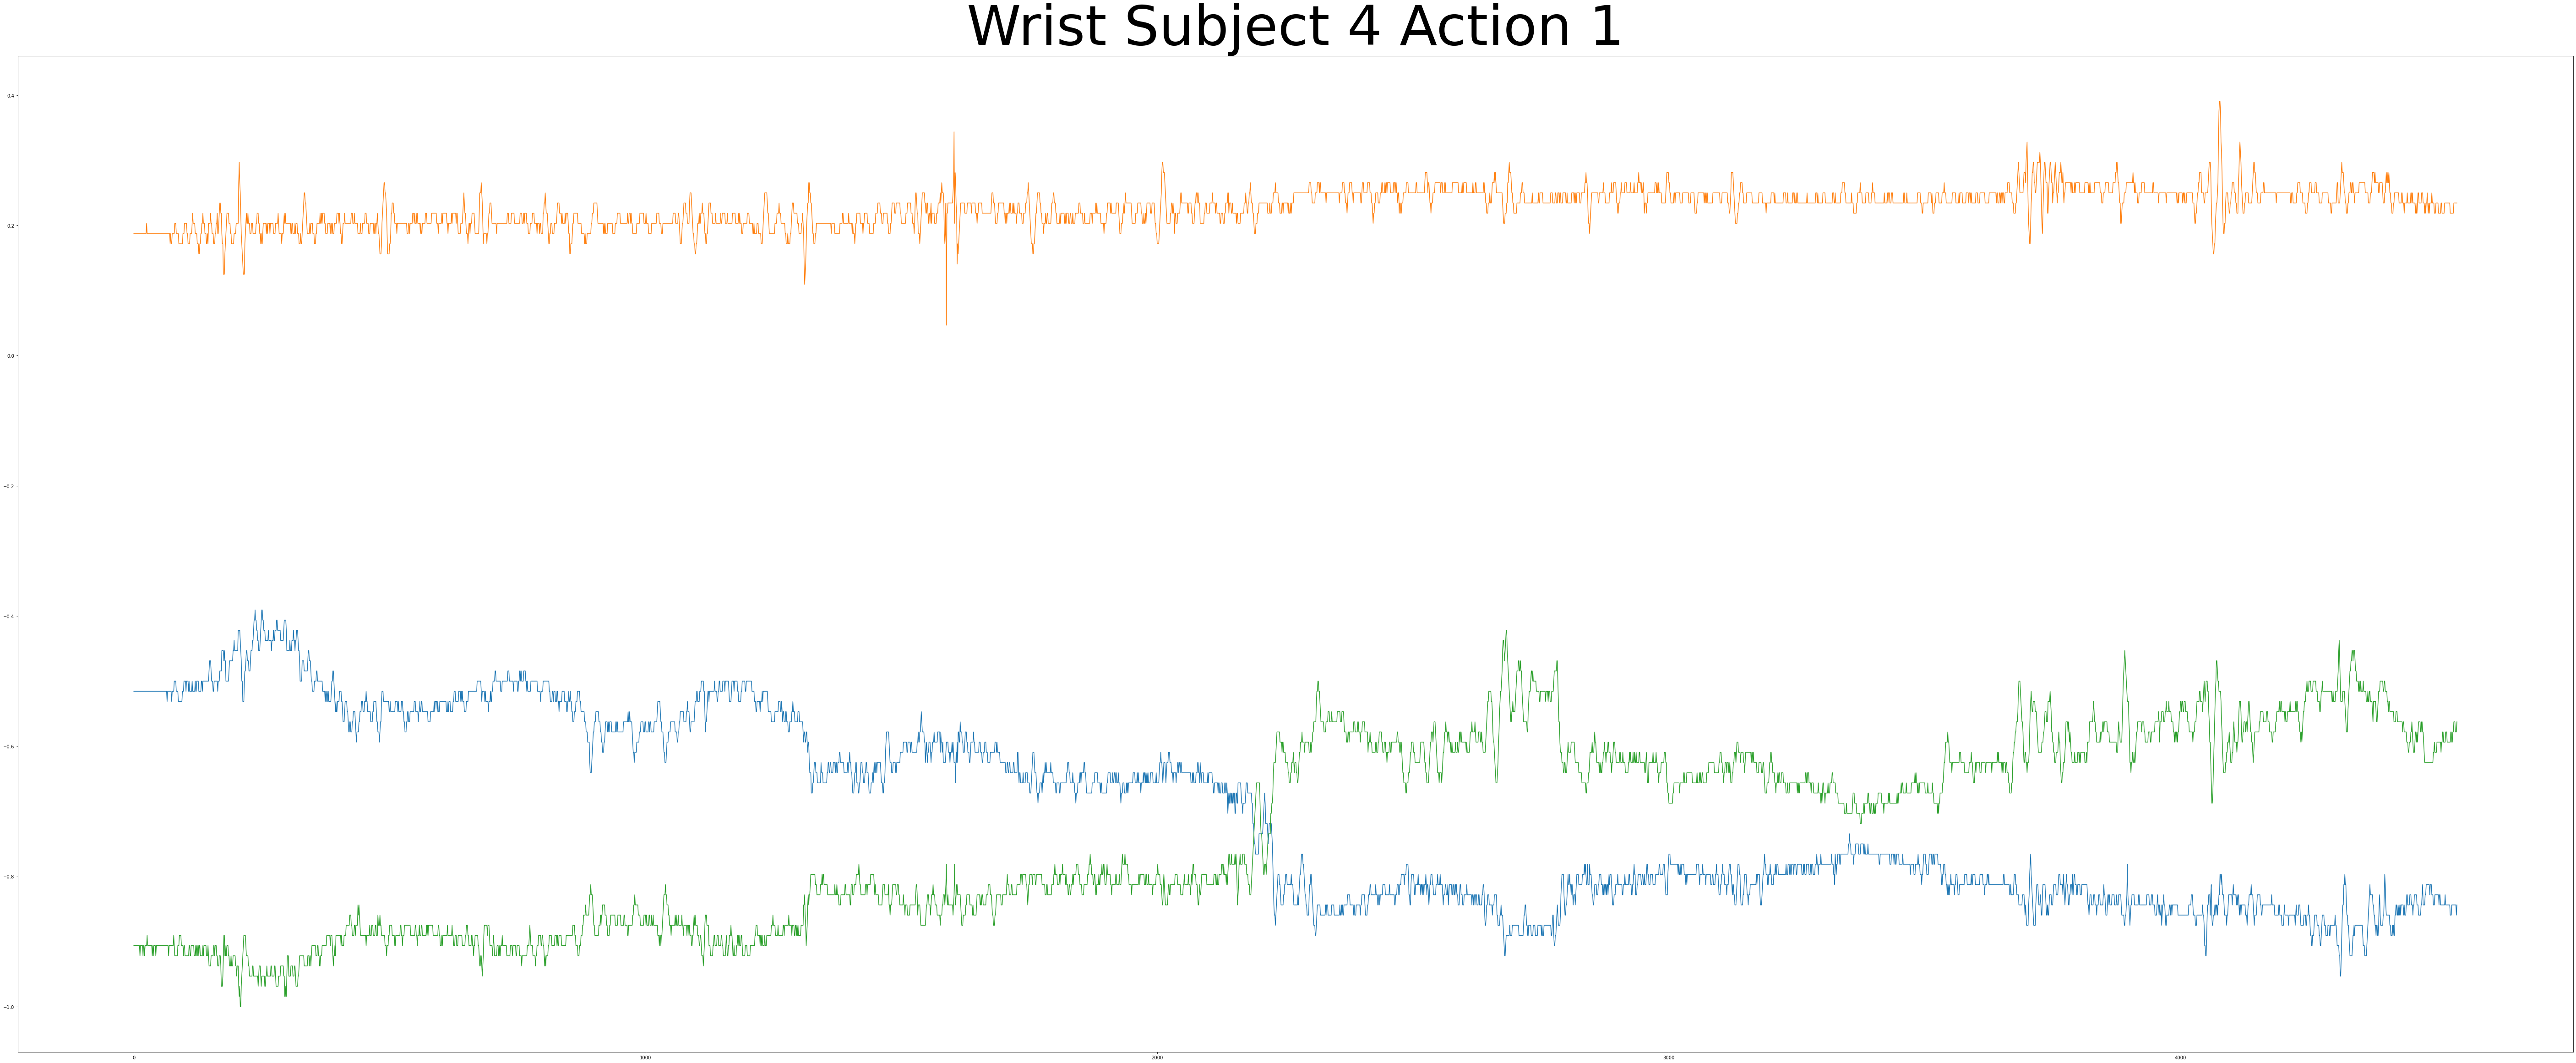

In [178]:
plot_acc_data(total_data['acw'], 4, '1', "Wrist Subject 4 Action 1")

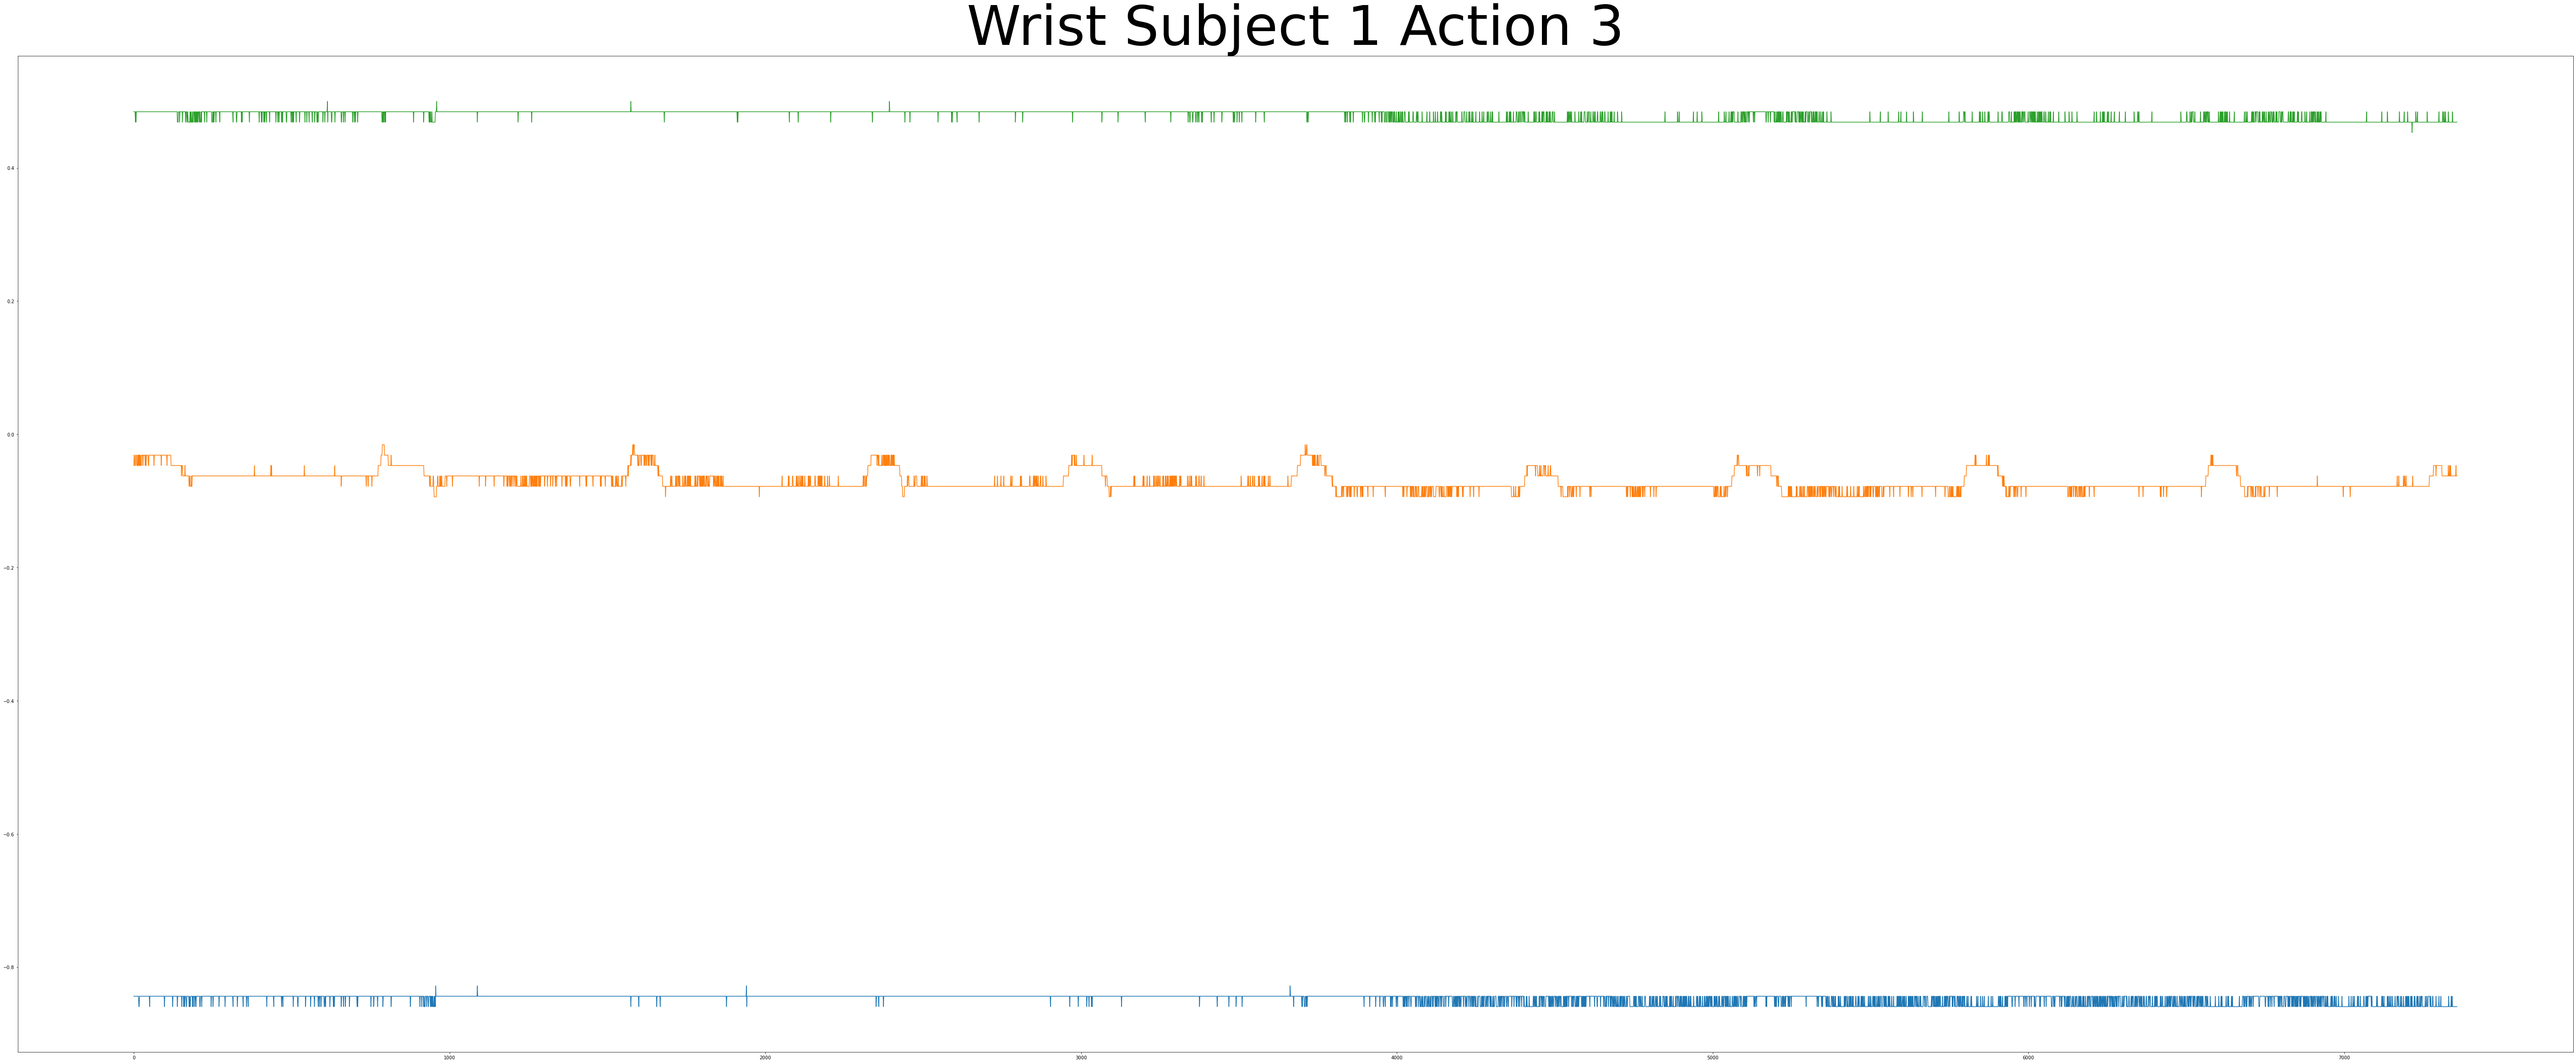

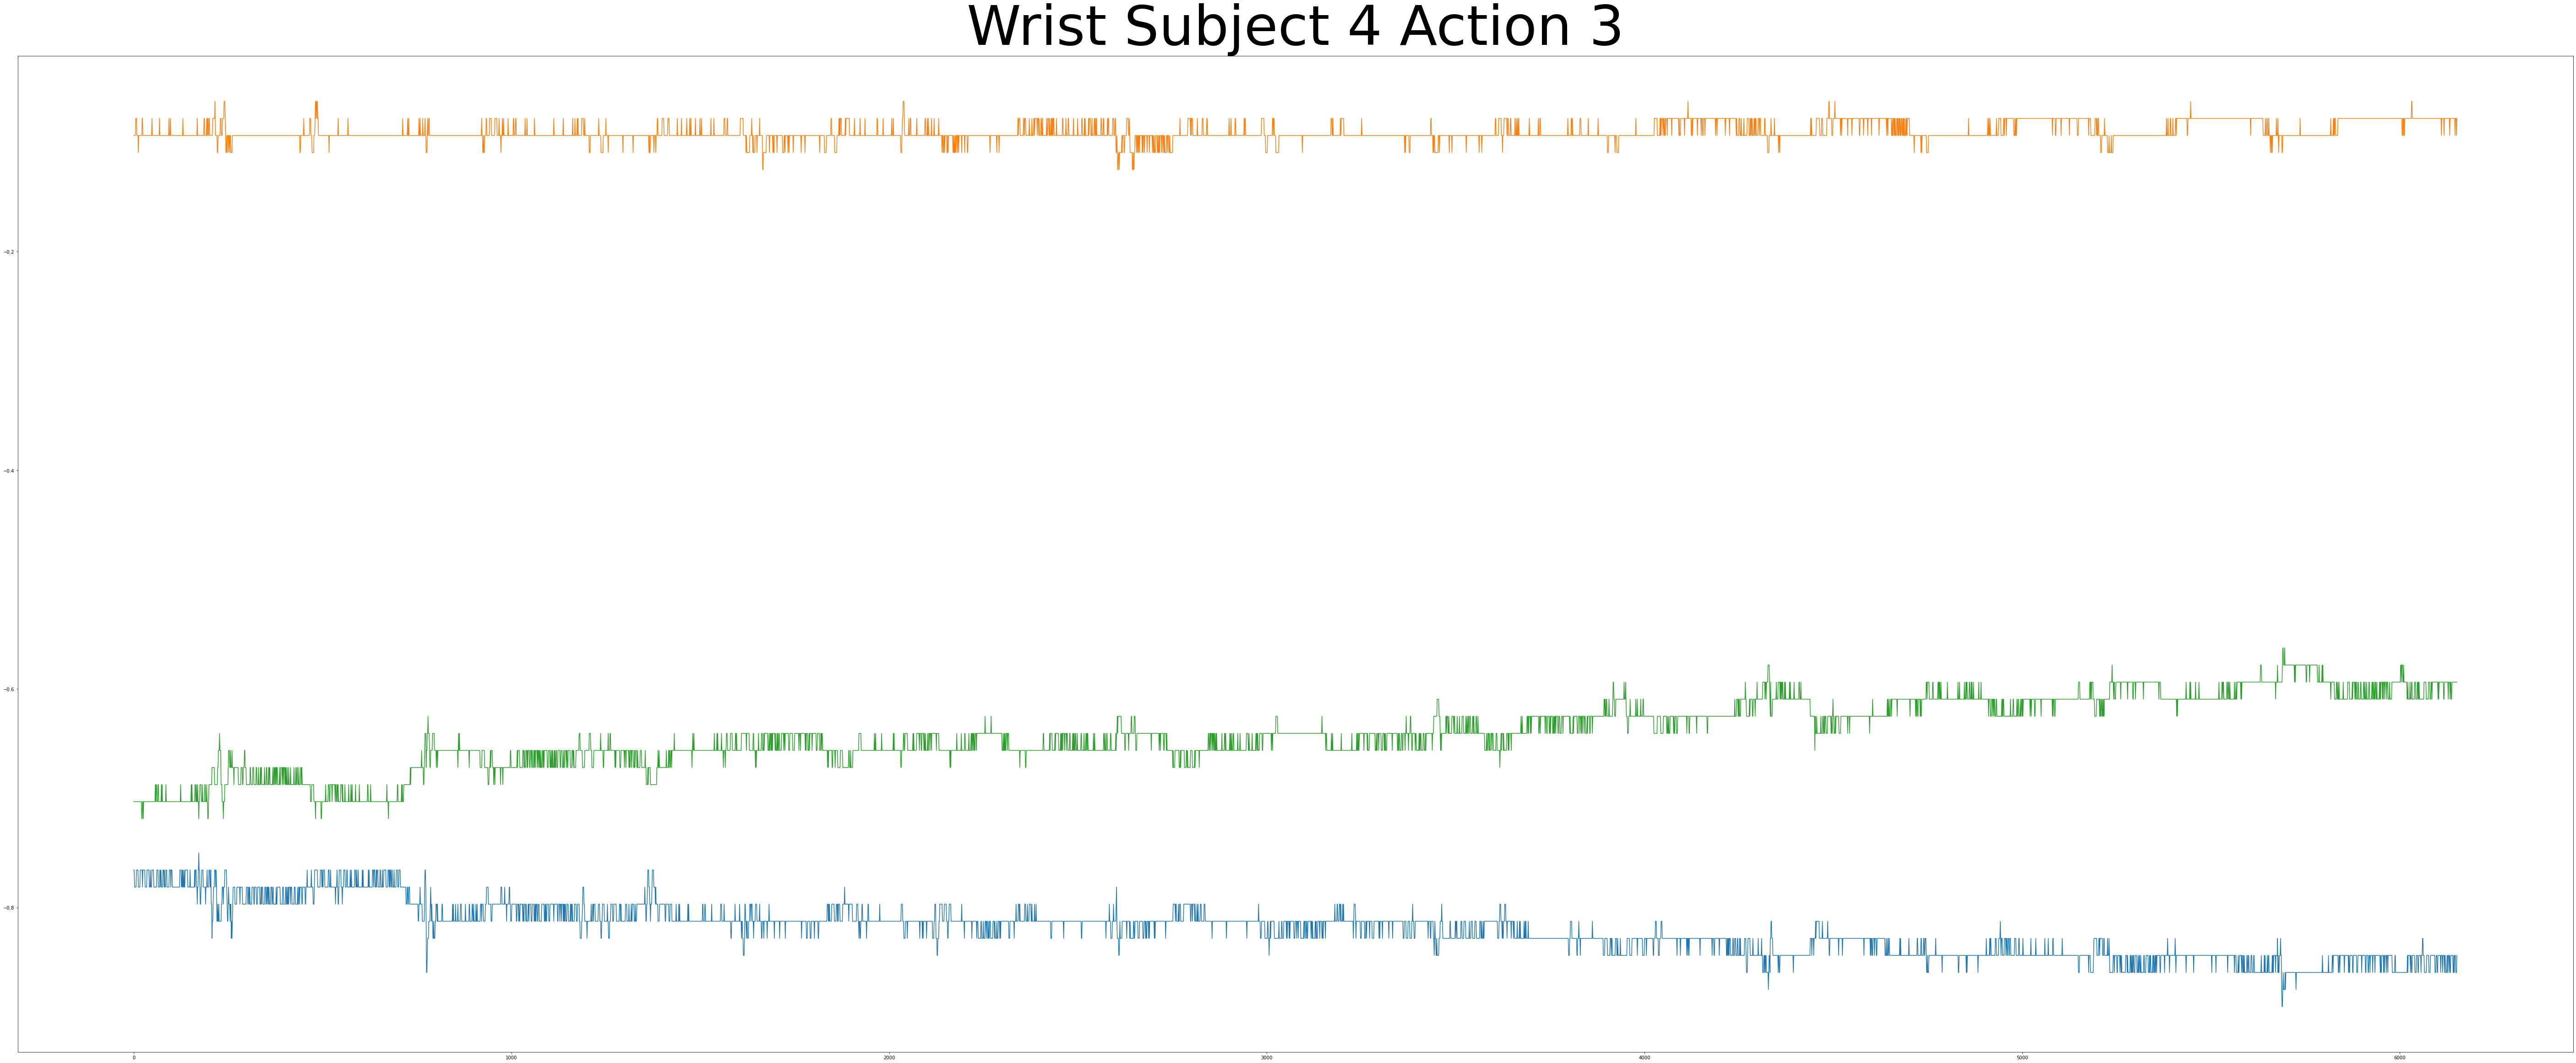

In [179]:
plot_acc_data(total_data['acw'], 3, '3', "Wrist Subject 1 Action 3")
plot_acc_data(total_data['acw'], 15, '3', "Wrist Subject 4 Action 3")

## Accelerometer on Thigh

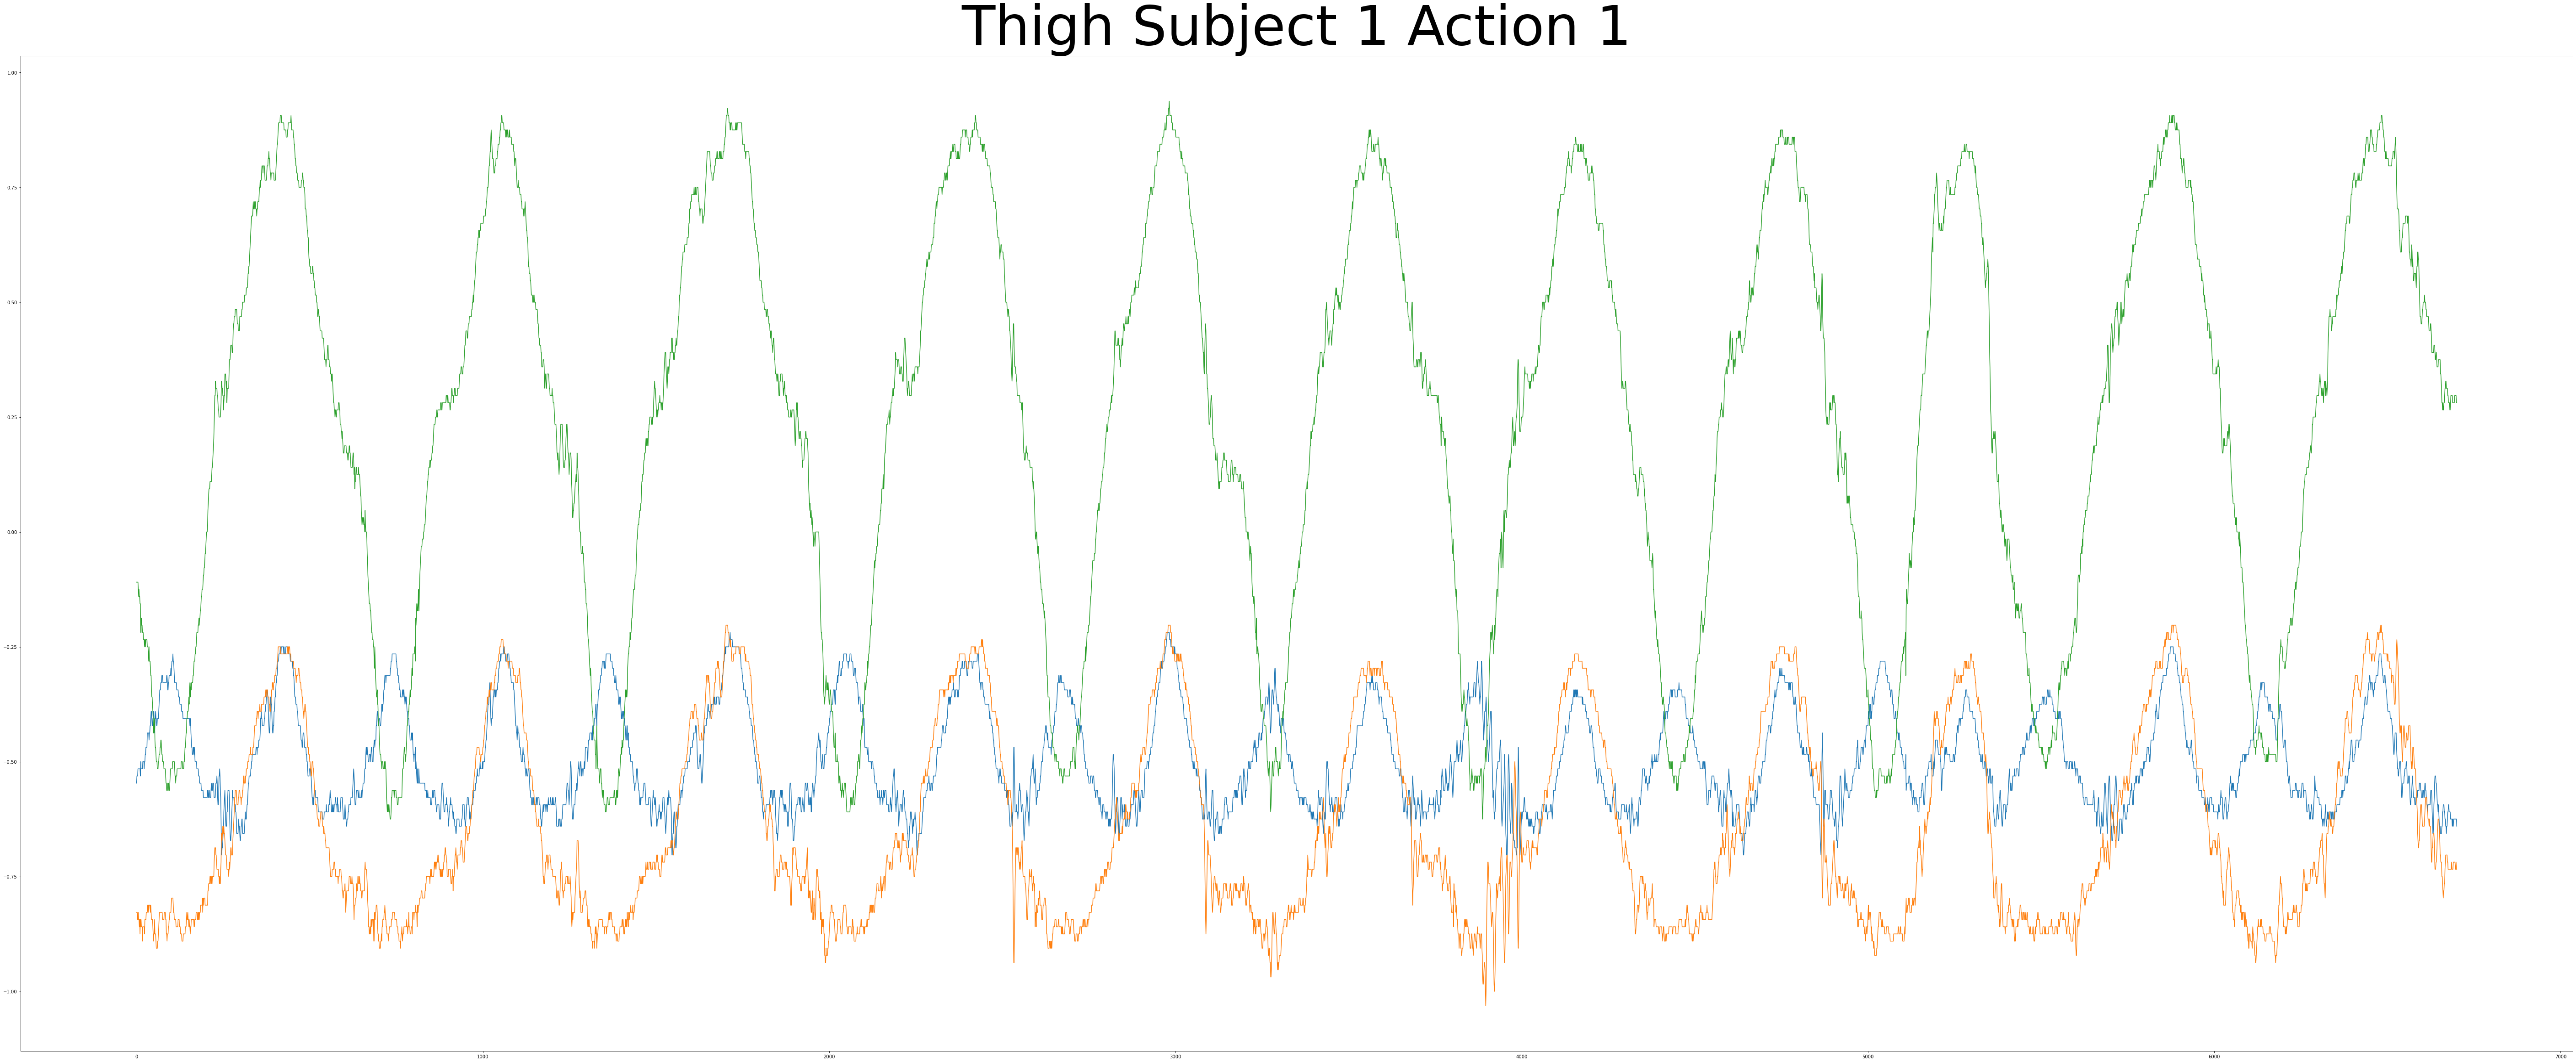

In [183]:
plot_acc_data(total_data['act'], 1, '1', "Thigh Subject 1 Action 1")

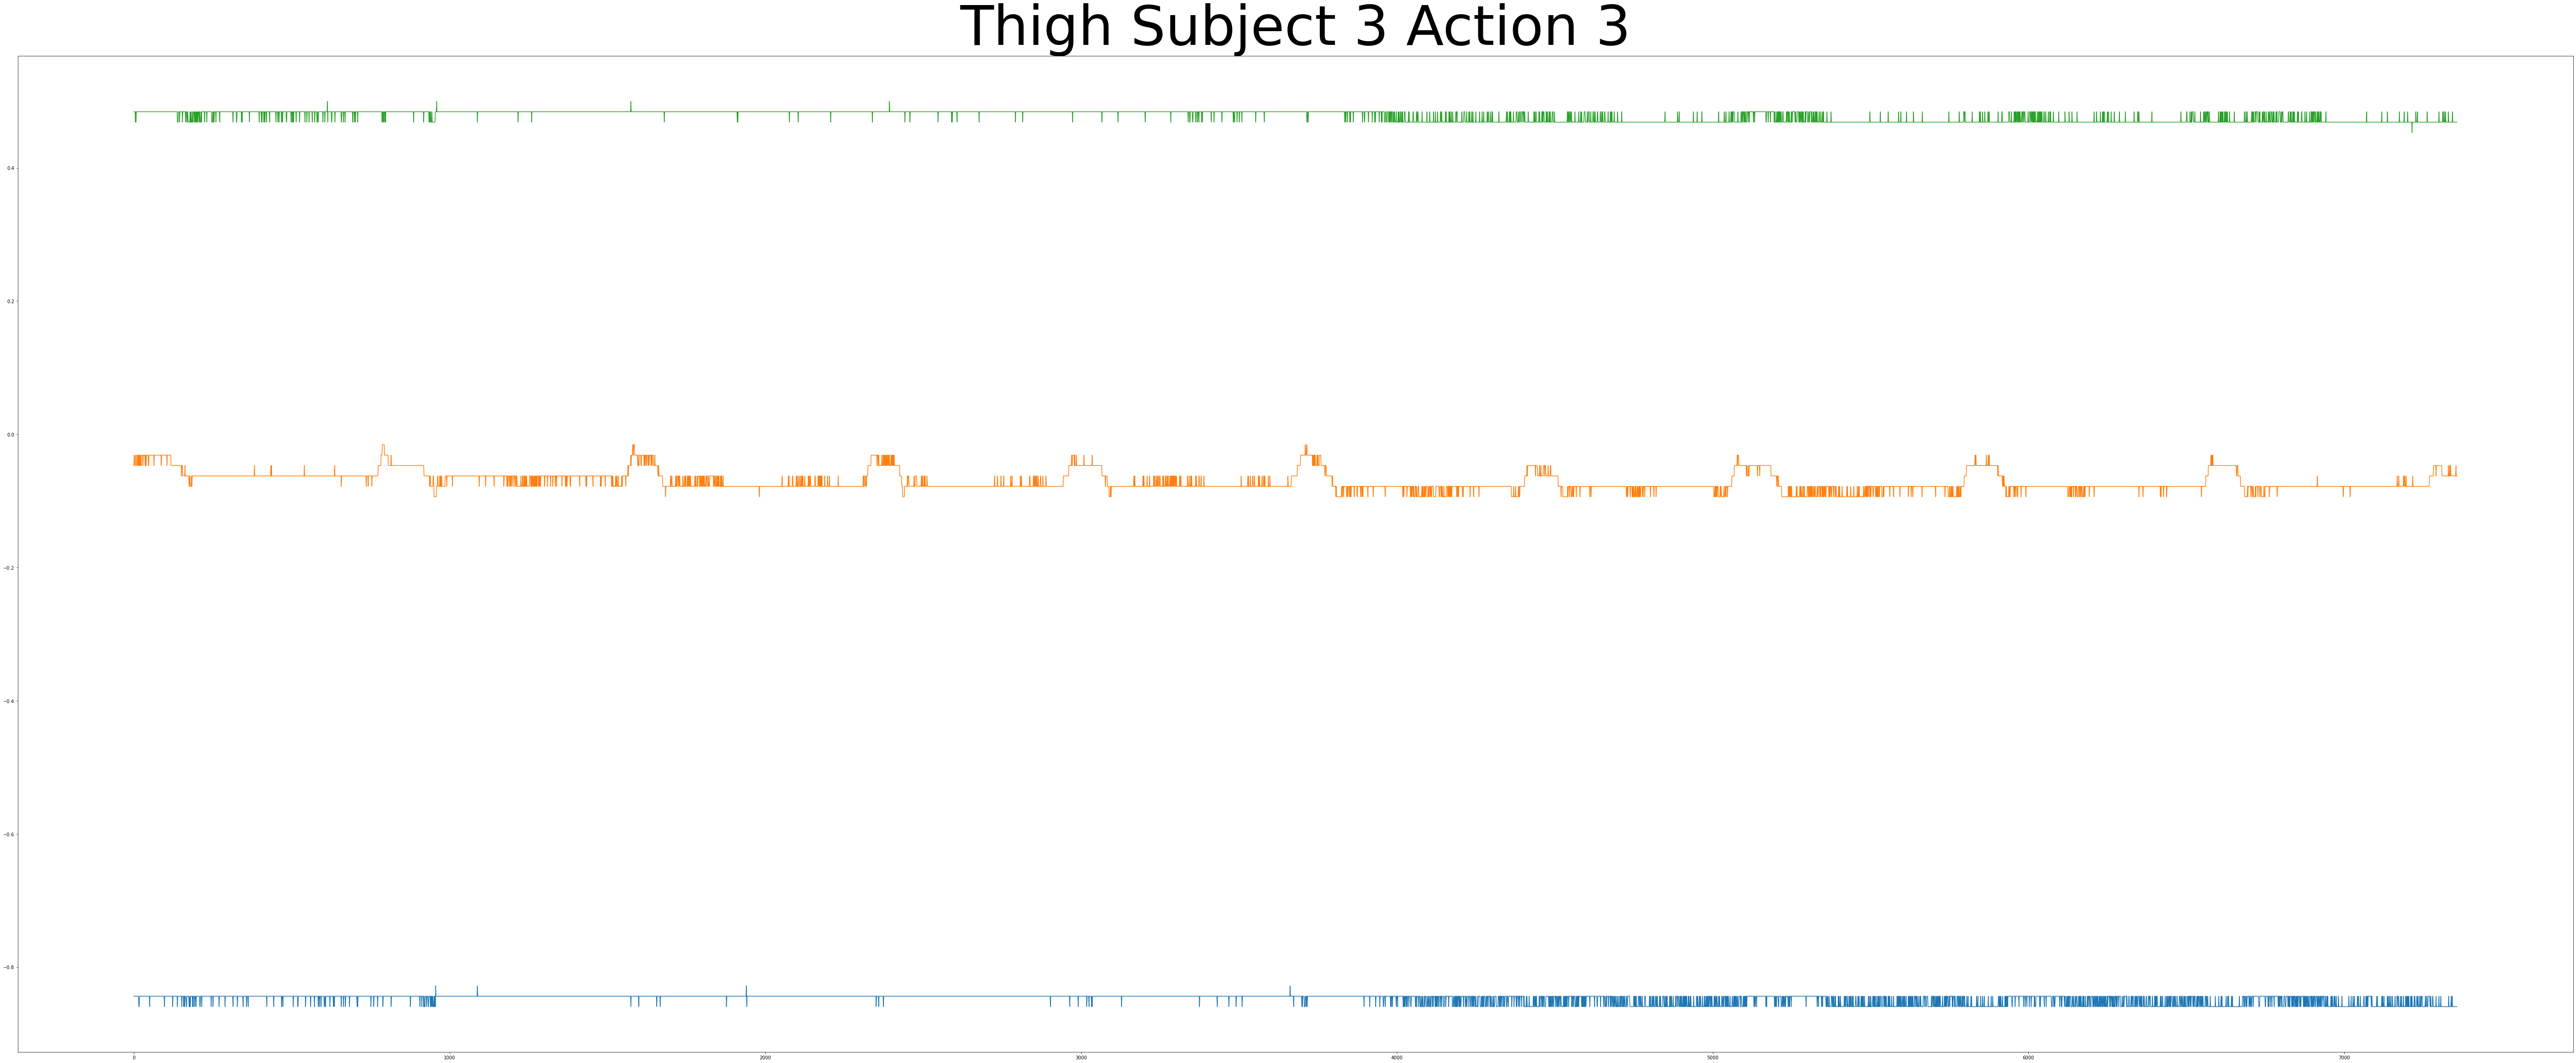

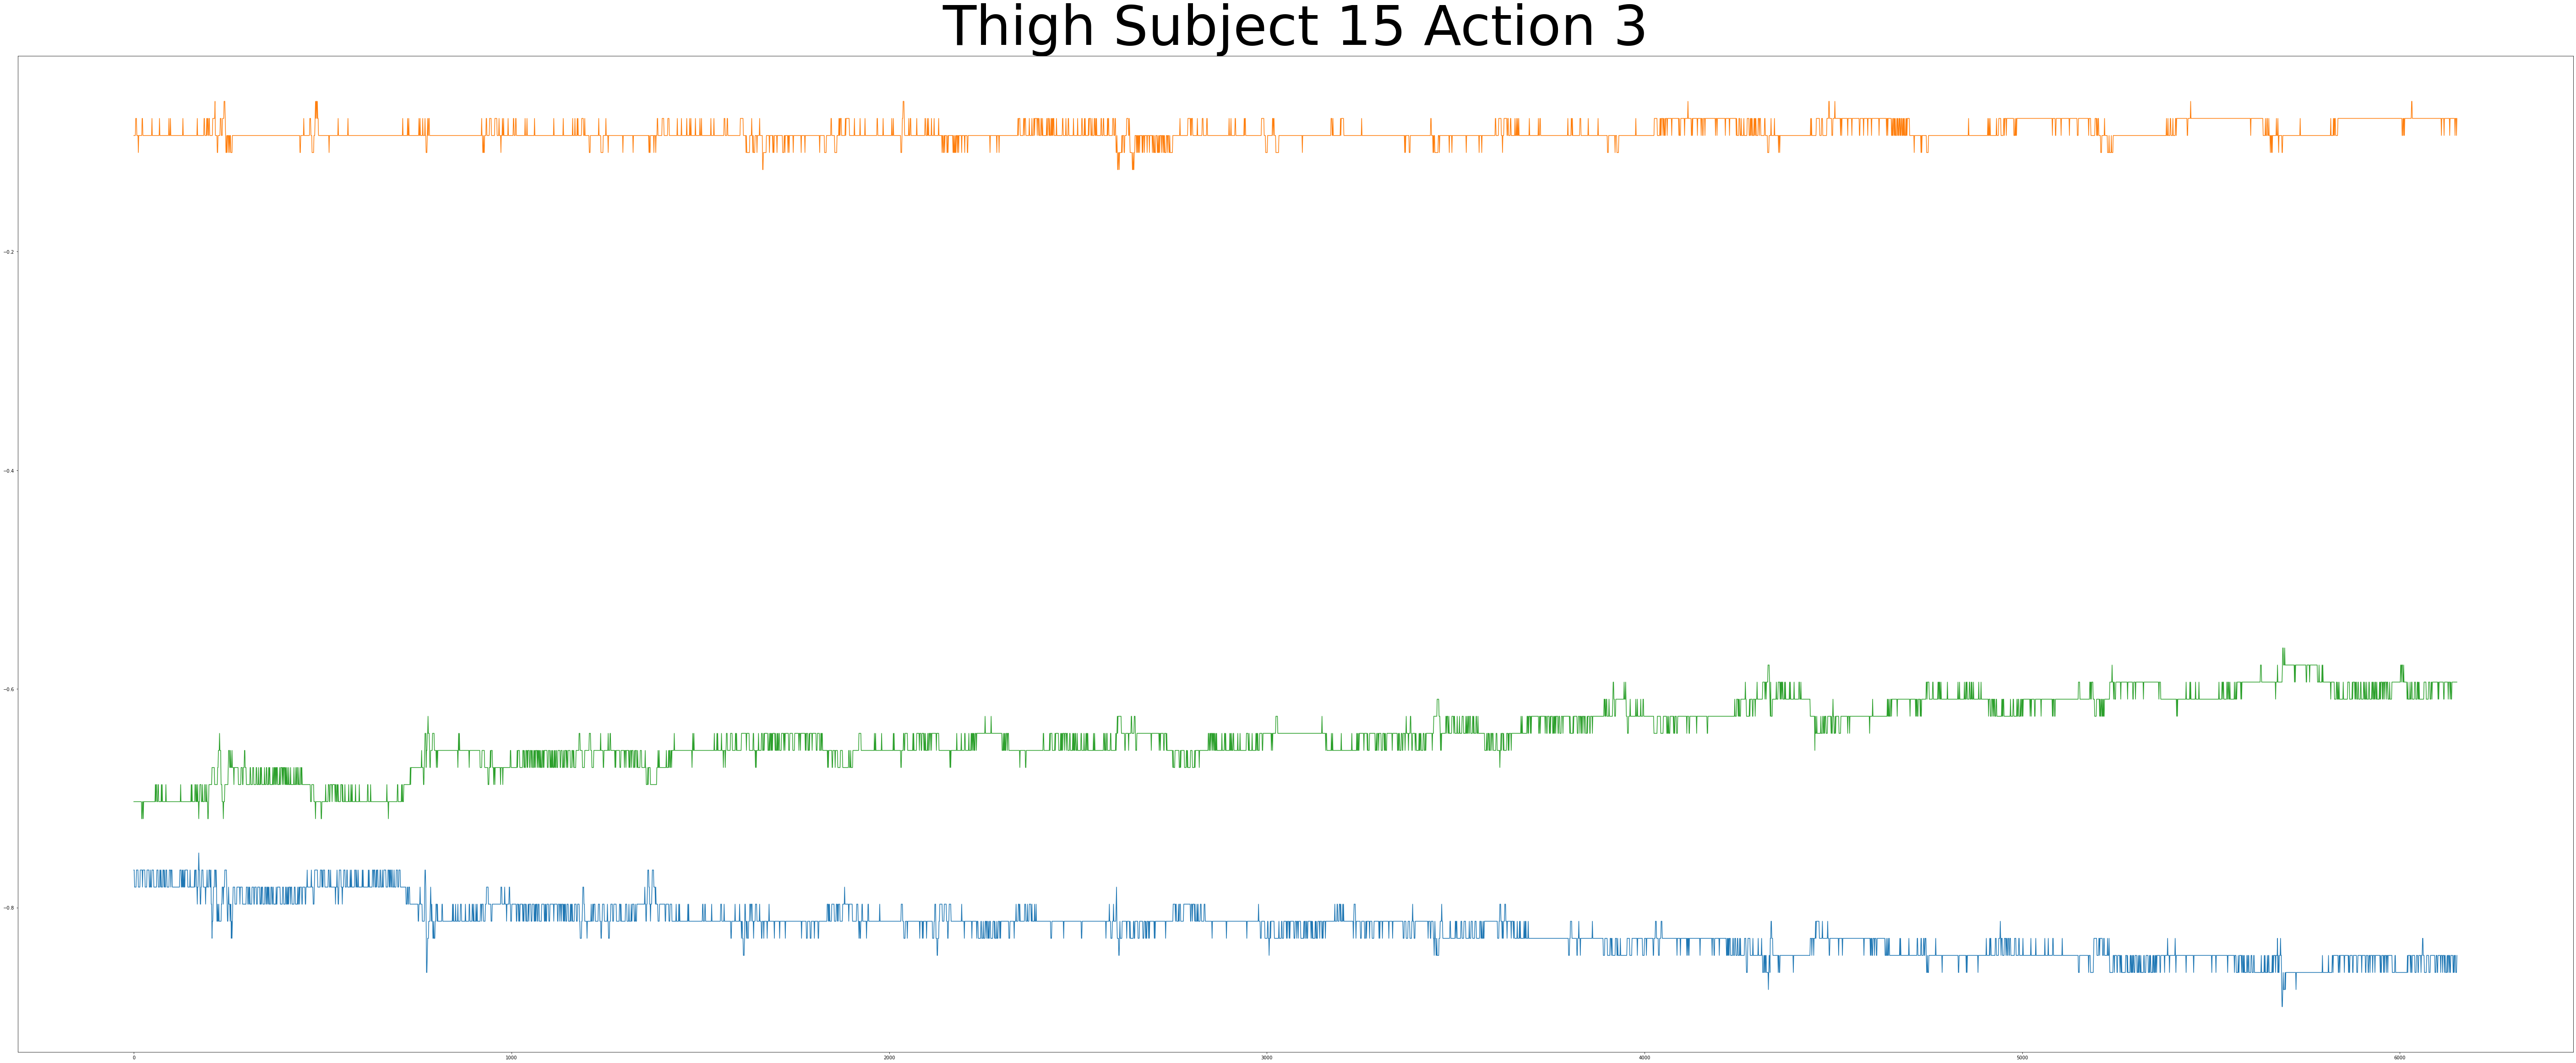

In [182]:
plot_acc_data(total_data['act'], 3, '3', "Thigh Subject 3 Action 3")
plot_acc_data(total_data['act'], 15, '3', "Thigh Subject 15 Action 3")

## What about both Acccerelometers  

In [191]:
def plot_2_acc_data(df_1, df_2, subject, action, title=""):
    plt.figure(figsize=(100, 40))
    arr_1 = df_1.to_numpy()
    arr_1 =  arr_1[arr_1[:,5] == action]
    arr_1 =  arr_1[arr_1[:,4] == subject]
    plt.plot(range(0,len(arr_1)),arr_1[:,1])
    plt.plot(range(0,len(arr_1)),arr_1[:,2])
    plt.plot(range(0,len(arr_1)),arr_1[:,3])
    
    arr_2 = df_2.to_numpy()
    arr_2 =  arr_2[arr_2[:,5] == action]
    arr_2 =  arr_2[arr_2[:,4] == subject]
    plt.plot(range(0,len(arr_2)),arr_2[:,1])
    plt.plot(range(0,len(arr_2)),arr_2[:,2])
    plt.plot(range(0,len(arr_2)),arr_2[:,3])
    
    
    plt.title(title,fontsize = 120)
    plt.show()

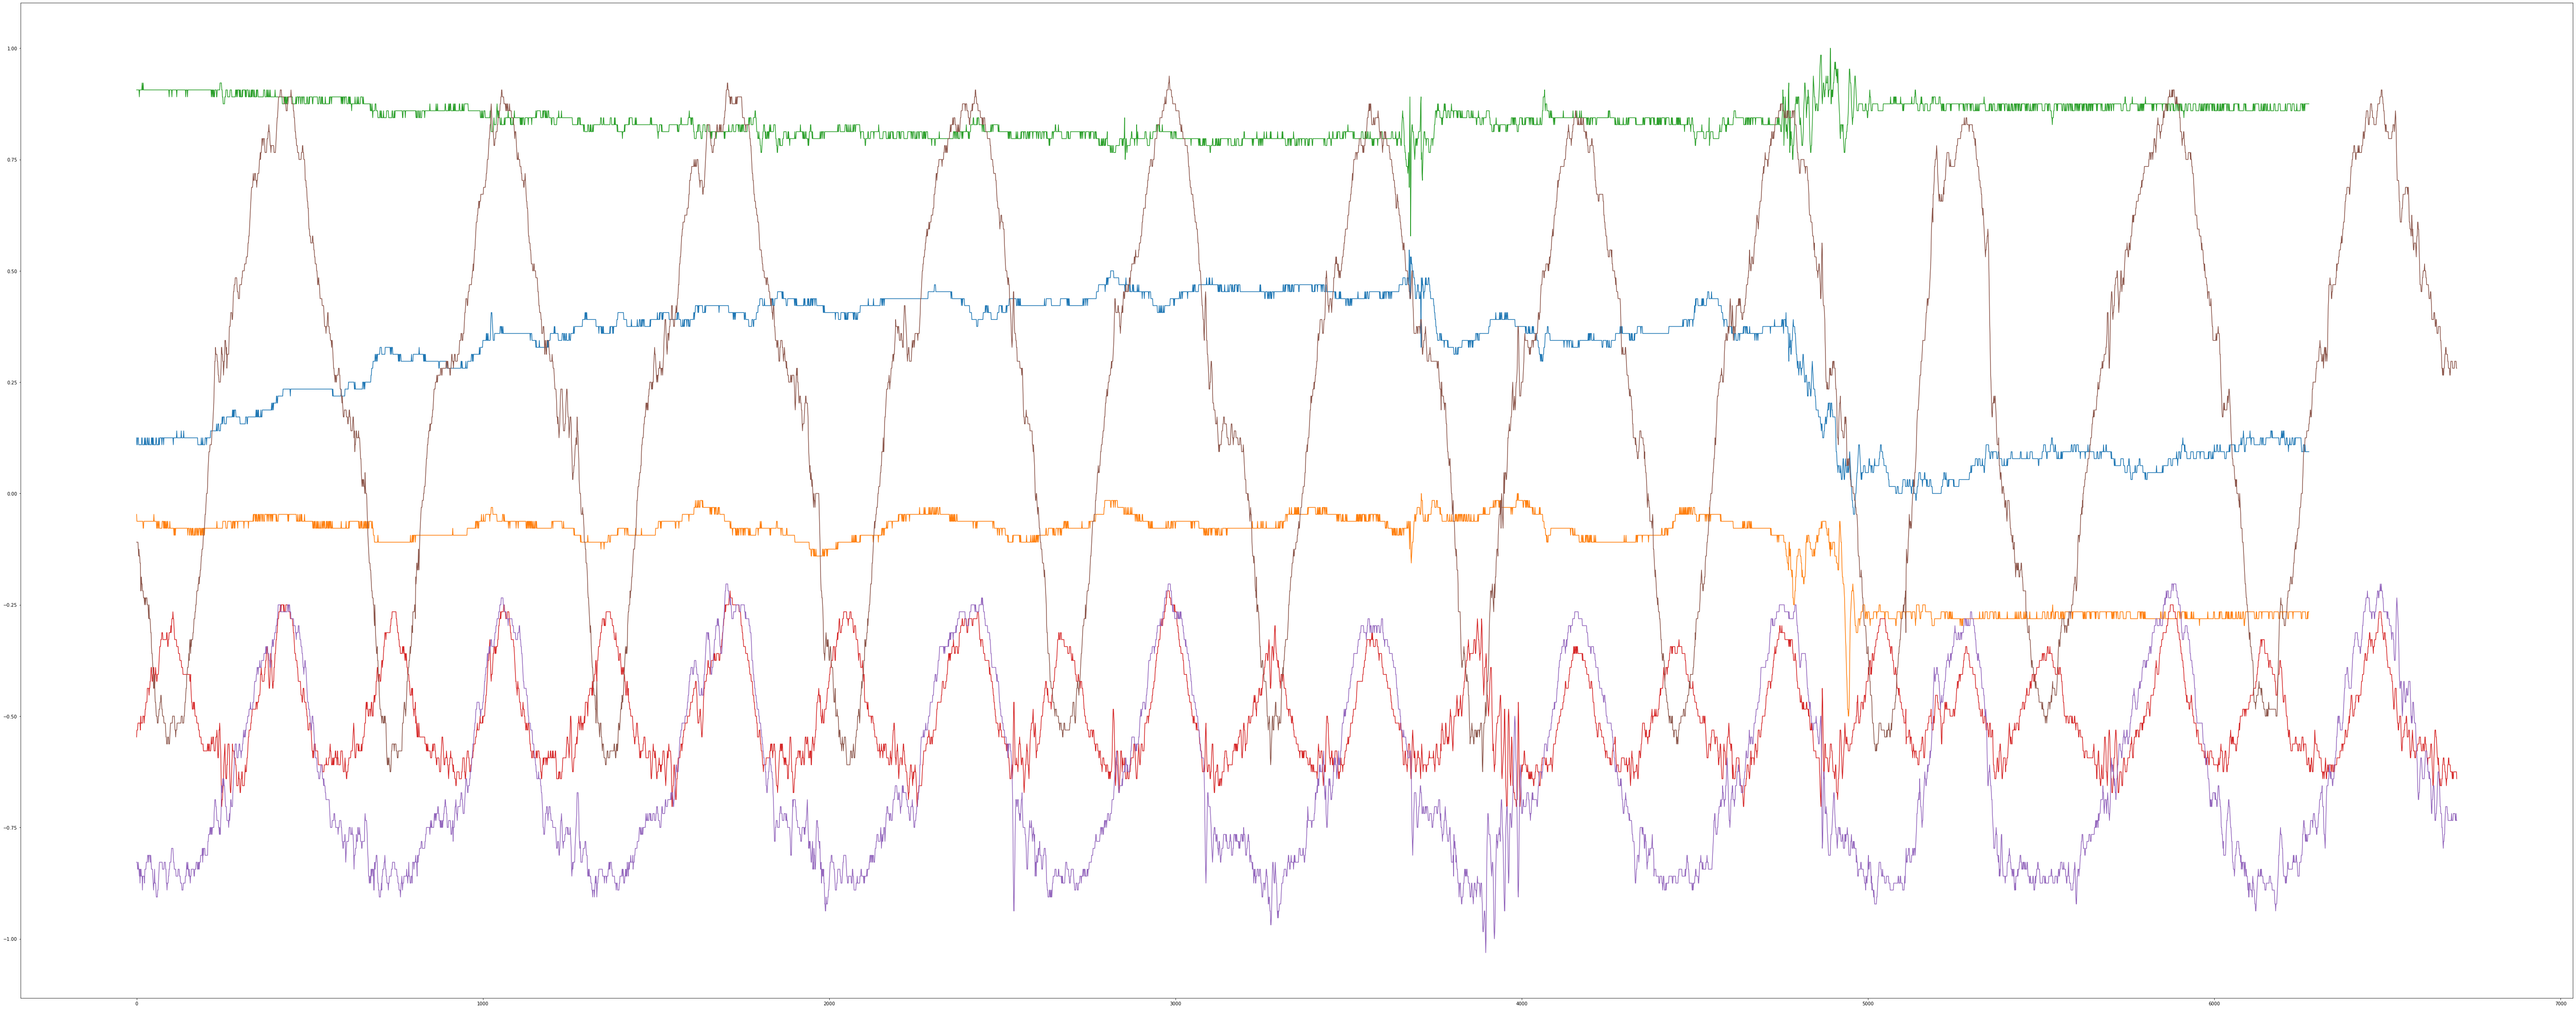

In [192]:
plot_2_acc_data(total_data['acw'], total_data['act'], 1, '1', title="")

In [195]:
def plot_2_acc_data_mean(df_1, df_2, subject, action, title=""):
    plt.figure(figsize=(100, 40))
    arr_1 = df_1.to_numpy()
    arr_1 =  arr_1[arr_1[:,5] == action]
    arr_1 =  arr_1[arr_1[:,4] == subject]
    x_data_1 = arr_1[:,1] + arr_1[:,2] + arr_1[:,3]
    plt.plot(range(0,len(arr_1)),x_data_1/3)
    
    arr_2 = df_2.to_numpy()
    arr_2 =  arr_2[arr_2[:,5] == action]
    arr_2 =  arr_2[arr_2[:,4] == subject]
    x_data_2 = arr_2[:,1] + arr_2[:,2] + arr_2[:,3]
    plt.plot(range(0,len(arr_2)),x_data_2/3)
    
    plt.title(title,fontsize = 120)
    plt.show()
    

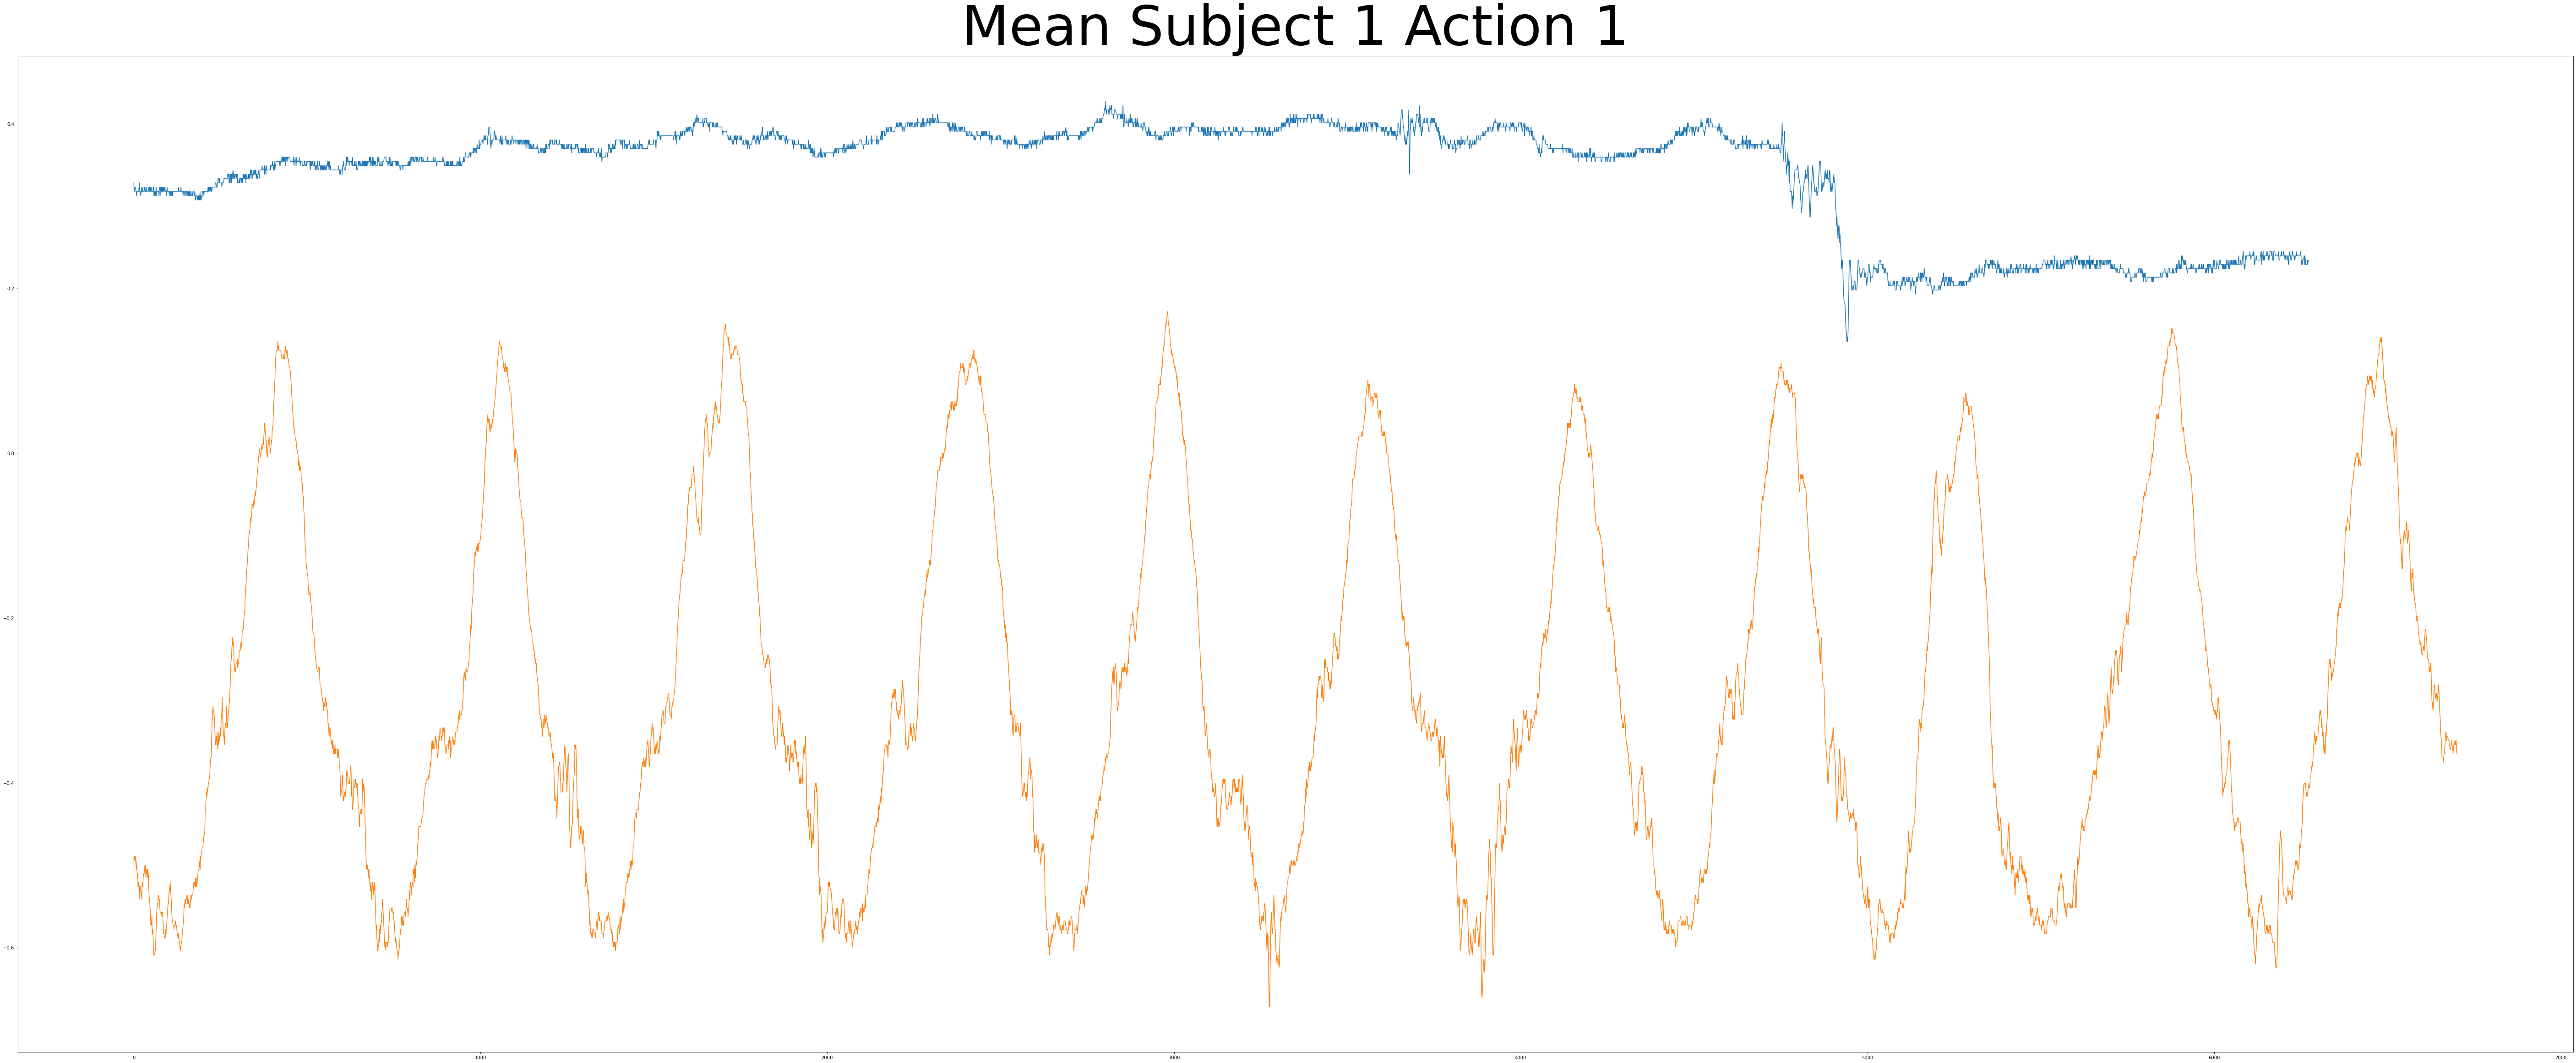

In [200]:
plot_2_acc_data_mean(total_data['acw'], total_data['act'], 1, '1', title="Mean Subject 1 Action 1")

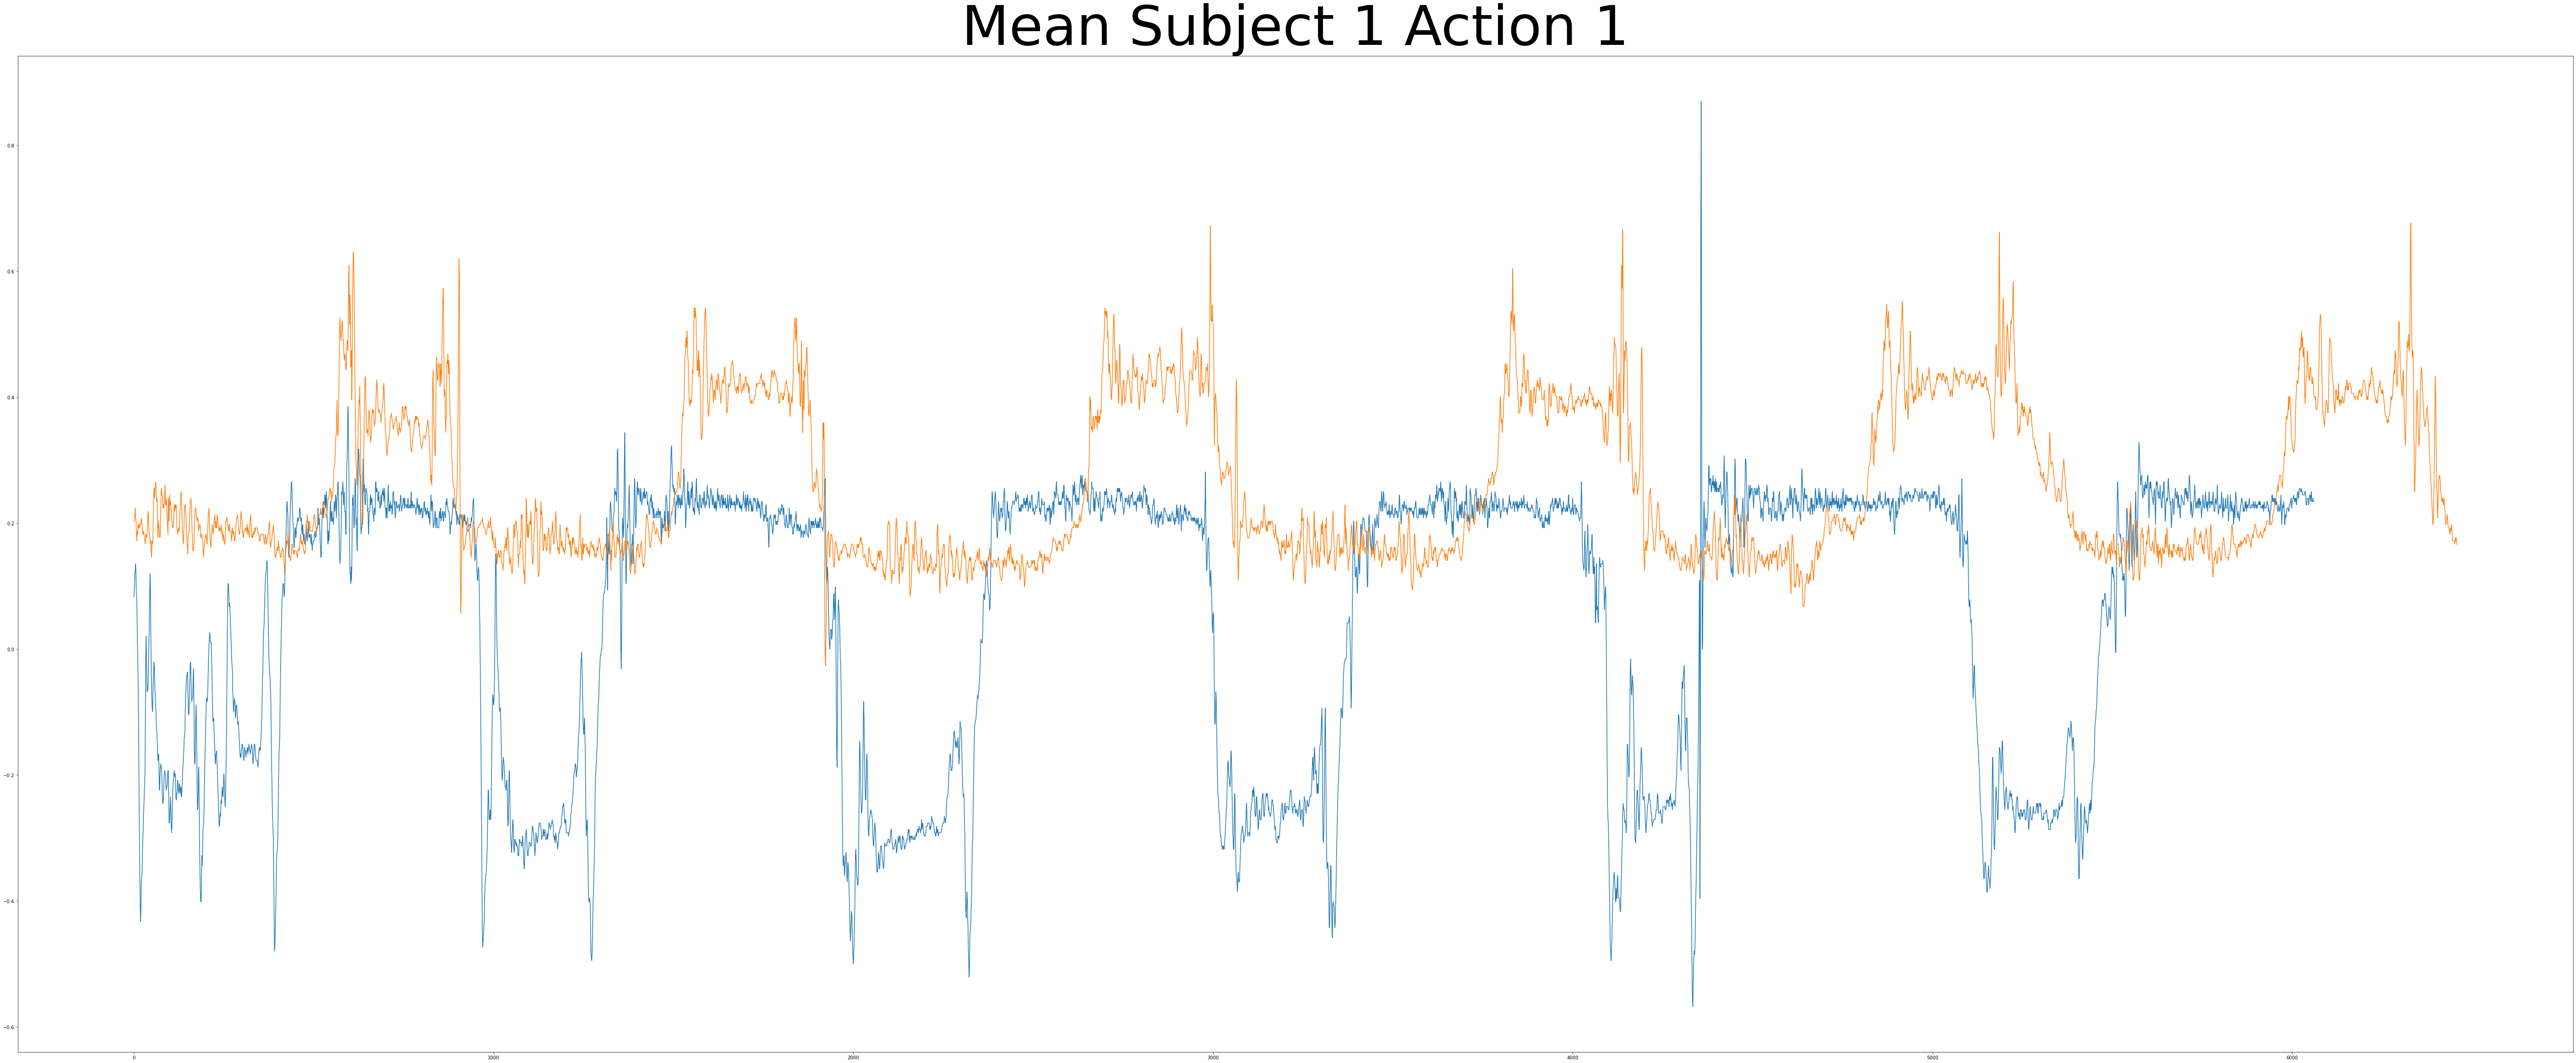

In [201]:
plot_2_acc_data_mean(total_data['acw'], total_data['act'], 1, '7', title="Mean Subject 1 Action 1")

## Show what is in each

In [14]:
for key in total_data.keys():
    if total_data[key] is not None:
        print(key)
        print(total_data[key]['action'].unique())
        print(total_data[key]['subject'].unique())
        for header in headers[key]:
            if(total_data[key][header].isnull().values.any()):
                print(f"{header} has Null data")
        print(total_data[key].info())
        print('-------------------------------------------------------------------------')

act
['1' '2' '3' '4-1' '4-2' '5' '6' '7']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400856 entries, 0 to 6418
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   times    1400856 non-null  object 
 1   X        1400856 non-null  float64
 2   Y        1400856 non-null  float64
 3   Z        1400856 non-null  float64
 4   subject  1400856 non-null  int64  
 5   action   1400856 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 74.8+ MB
None
-------------------------------------------------------------------------
acw
['1' '2' '3' '4-1' '4-2' '5' '6' '7']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313695 entries, 0 to 6013
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype  
---  -----

In [15]:
df_acw = total_data['acw']
subject = 1
action = '1'
df_acw[(df_acw.subject == subject) & (df_acw.action == action)]

times         X         Y        Z  subject action
0     2018-11-08 11:34:51.474000  0.125000 -0.046875  0.90625        1      1
1     2018-11-08 11:34:51.485000  0.109375 -0.062500  0.90625        1      1
2     2018-11-08 11:34:51.495000  0.109375 -0.062500  0.90625        1      1
3     2018-11-08 11:34:51.505000  0.125000 -0.062500  0.90625        1      1
4     2018-11-08 11:34:51.516000  0.125000 -0.062500  0.90625        1      1
...                          ...       ...       ...      ...      ...    ...
6269  2018-11-08 11:35:56.373000  0.093750 -0.265625  0.87500        1      1
6270  2018-11-08 11:35:56.383000  0.093750 -0.281250  0.87500        1      1
6271  2018-11-08 11:35:56.394000  0.093750 -0.265625  0.87500        1      1
6272  2018-11-08 11:35:56.404000  0.093750 -0.265625  0.87500        1      1
6273  2018-11-08 11:35:56.414000  0.093750 -0.265625  0.87500        1      1

[6274 rows x 6 columns]

In [16]:
total_data['pm'].head()


times  sensor_1  sensor_2  sensor_3  sensor_4  \
0  2018-11-08 11:34:51.468000      20.0       3.0       2.0       0.0   
1  2018-11-08 11:34:51.535000      20.0       3.0       2.0       0.0   
2  2018-11-08 11:34:51.602000      20.0       3.0       2.0       0.0   
3  2018-11-08 11:34:51.669000      20.0       3.0       2.0       0.0   
4  2018-11-08 11:34:51.737000      20.0       3.0       2.0       0.0   

   sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  ...  sensor_505  \
0       0.0       0.0      72.0    1493.0    1949.0  ...        68.0   
1       0.0       0.0      72.0    1493.0    1949.0  ...        58.0   
2       0.0       0.0      72.0    1493.0    1949.0  ...        64.0   
3       0.0       0.0      72.0    1493.0    1949.0  ...        66.0   
4       0.0       0.0      72.0    1493.0    1949.0  ...        64.0   

   sensor_506  sensor_507  sensor_508  sensor_509  sensor_510  sensor_511  \
0        77.0        55.0       193.0       387.0       331.0       125.0   
1        78.0        53.0       192.0       388.0       330.0       123.0   
2        78.0        53.0       195.0       390.0       330.0       119.0   
3        79.0        55.0       196.0       391.0       324.0       106.0   
4        79.0        55.0       194.0       391.0       321.0       114.0   

   sensor_512  subject  action  
0         6.0        1       1  
1         6.0        1       1  
2         7.0        1       1  
3         5.0        1       1  
4         6.0        1       1  

[5 rows x 515 columns]

In [17]:
# show reshape is doing what we think
x = np.array([[1,2,3],
          [4,5,6],
          [7,8,9],
          [10,11,12],
          [13,14,15],
          [16,17,18]])
y = np.array(range(0,24))
y = np.reshape(y, (6,4))

z = np.array(range(0,30))
z = np.reshape(z, (6, 5))


np.hstack((x,y,z))

array([[ 1,  2,  3,  0,  1,  2,  3,  0,  1,  2,  3,  4],
       [ 4,  5,  6,  4,  5,  6,  7,  5,  6,  7,  8,  9],
       [ 7,  8,  9,  8,  9, 10, 11, 10, 11, 12, 13, 14],
       [10, 11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 19],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29]])

In [18]:
%%time
# take the total dfs and make batches for each action each subject completed
# samples100 is how many samples should be in the 100HZ (the two accleromter data)
# samples15 is how many samples from the images should be take
subjects = range(1,31)
dc_X_cols = [f"sensor_{i}" for i in range(1,193)]
pm_X_cols = [f"sensor_{i}" for i in range(1,513)]
acw_X_cols = ["X", "Y", "Z"]

def batch_data(total_dfs, seconds=5):
    samples100 = 100*seconds
    samples15 = 15*seconds
    df_acw = total_dfs['acw']
    df_act = total_dfs['act']
    df_dc = total_dfs['dc']
    df_pm = total_dfs['pm']
    
    all_cols = []
    for i in range(0, samples100):
        all_cols += [f"acw_{val}_{i}" for val in acw_X_cols]
    for i in range(0, samples15):
        all_cols += [f"dc_{val}_{i}" for val in dc_X_cols]
    for i in range(0, samples15):
        all_cols += [f"pm_{val}_{i}" for val in pm_X_cols]
    for i in range(0, samples100):
        all_cols += [f"act_{val}_{i}" for val in acw_X_cols]
    
    
    df_all = pd.DataFrame(columns=all_cols+['action'])
    
    actions = df_acw['action'].unique()
    pbar = tqdm(desc="batch data", total=len(subjects)*len(actions))
    for subject in subjects:
        actions = df_acw['action'].unique()
        for action in actions:
            X_acw = df_acw[(df_acw.subject == subject) & (df_acw.action == action)][acw_X_cols].to_numpy()
            X_acw = X_acw[range(0, (X_acw.shape[0]//samples100)*samples100)] # cut off records that don't fit in the window
            X_acw = np.reshape(X_acw, (X_acw.shape[0]//samples100, samples100*len(acw_X_cols)))
            
            X_dc = df_dc[(df_dc.subject == subject) & (df_dc.action == action)][dc_X_cols].to_numpy()
            X_dc = X_dc[range(0, (X_dc.shape[0]//samples15)*samples15)]
            X_dc = np.reshape(X_dc, (X_dc.shape[0]//samples15, samples15*len(dc_X_cols)))
            
            X_pm = df_pm[(df_pm.subject == subject) & (df_pm.action == action)][pm_X_cols].to_numpy()
            X_pm = X_pm[range(0, (X_pm.shape[0]//samples15)*samples15)]
            X_pm = np.reshape(X_pm, (X_pm.shape[0]//samples15, samples15*len(pm_X_cols)))
            
            X_act = df_act[(df_act.subject == subject) & (df_act.action == action)][acw_X_cols].to_numpy()
            X_act = X_act[range(0, (X_act.shape[0]//samples100)*samples100)]
            X_act = np.reshape(X_act, (X_act.shape[0]//samples100, samples100*len(acw_X_cols)))
            
            # trim to the smallest one of these 4
            num_records = min(X_acw.shape[0], X_act.shape[0], X_pm.shape[0], X_dc.shape[0])
            X_acw = X_acw[range(0,num_records)]
            X_dc = X_dc[range(0,num_records)]
            X_pm = X_pm[range(0,num_records)]
            X_act = X_act[range(0,num_records)]
            
            X_total = np.hstack((X_acw, X_dc, X_pm, X_act))
            
            df_tmp = pd.DataFrame(X_total, columns=all_cols)
            df_tmp['action'] = action
            df_all = pd.concat([df_all, df_tmp])
            
            pbar.update(1)
            
    return df_all

df_batched = batch_data(total_data, seconds=3)
df_batched.head()

batch data:   0%|          | 0/240 [00:00<?, ?it/s]

Wall time: 1min 8s


acw_X_0   acw_Y_0   acw_Z_0   acw_X_1   acw_Y_1   acw_Z_1   acw_X_2  \
0  0.125000 -0.046875  0.906250  0.109375 -0.062500  0.906250  0.109375   
1  0.156250 -0.062500  0.906250  0.156250 -0.062500  0.890625  0.156250   
2  0.218750 -0.078125  0.890625  0.218750 -0.078125  0.875000  0.234375   
3  0.281250 -0.093750  0.859375  0.281250 -0.093750  0.875000  0.281250   
4  0.359375 -0.062500  0.843750  0.359375 -0.062500  0.843750  0.359375   

    acw_Y_2   acw_Z_2   acw_X_3  ...  act_X_297  act_Y_297  act_Z_297  \
0 -0.062500  0.906250  0.125000  ...  -0.640625  -0.562500   0.437500   
1 -0.062500  0.890625  0.156250  ...  -0.625000  -0.796875   0.171875   
2 -0.078125  0.890625  0.234375  ...  -0.593750  -0.750000   0.281250   
3 -0.093750  0.859375  0.281250  ...  -0.593750  -0.734375   0.296875   
4 -0.078125  0.843750  0.359375  ...  -0.593750  -0.734375   0.312500   

   act_X_298  act_Y_298  act_Z_298  act_X_299  act_Y_299  act_Z_299  action  
0  -0.656250  -0.562500   0.468750  -0.671875  -0.578125   0.468750       1  
1  -0.625000  -0.781250   0.171875  -0.625000  -0.781250   0.171875       1  
2  -0.609375  -0.750000   0.296875  -0.609375  -0.750000   0.296875       1  
3  -0.593750  -0.734375   0.296875  -0.593750  -0.734375   0.296875       1  
4  -0.578125  -0.734375   0.312500  -0.593750  -0.734375   0.296875       1  

[5 rows x 33481 columns]

In [19]:
df_batched.groupby('action').count()

acw_X_0  acw_Y_0  acw_Z_0  acw_X_1  acw_Y_1  acw_Z_1  acw_X_2  \
action                                                                  
1           419      419      419      419      419      419      419   
2           447      447      447      447      447      447      447   
3           449      449      449      449      449      449      449   
4-1         226      226      226      226      226      226      226   
4-2         198      198      198      198      198      198      198   
5           427      427      427      427      427      427      427   
6           398      398      398      398      398      398      398   
7           441      441      441      441      441      441      441   

        acw_Y_2  acw_Z_2  acw_X_3  ...  act_Z_296  act_X_297  act_Y_297  \
action                             ...                                    
1           419      419      419  ...        419        419        419   
2           447      447      447  ...        447        447        447   
3           449      449      449  ...        449        449        449   
4-1         226      226      226  ...        226        226        226   
4-2         198      198      198  ...        198        198        198   
5           427      427      427  ...        427        427        427   
6           398      398      398  ...        398        398        398   
7           441      441      441  ...        441        441        441   

        act_Z_297  act_X_298  act_Y_298  act_Z_298  act_X_299  act_Y_299  \
action                                                                     
1             419        419        419        419        419        419   
2             447        447        447        447        447        447   
3             449        449        449        449        449        449   
4-1           226        226        226        226        226        226   
4-2           198        198        198        198        198        198   
5             427        427        427        427        427        427   
6             398        398        398        398        398        398   
7             441        441        441        441        441        441   

        act_Z_299  
action             
1             419  
2             447  
3             449  
4-1           226  
4-2           198  
5             427  
6             398  
7             441  

[8 rows x 33480 columns]

# Stick the data into a net

In [20]:
seconds = 3
samples100 = 100*seconds
samples15 = 15*seconds

all_cols = []
for i in range(0, samples100):
    all_cols += [f"acw_{val}_{i}" for val in acw_X_cols]
for i in range(0, samples15):
    all_cols += [f"dc_{val}_{i}" for val in dc_X_cols]
for i in range(0, samples15):
    all_cols += [f"pm_{val}_{i}" for val in pm_X_cols]
for i in range(0, samples100):
    all_cols += [f"act_{val}_{i}" for val in acw_X_cols]

In [21]:
X = df_batched[all_cols].to_numpy()
X.shape

(3005, 33480)

In [64]:
df_y = pd.get_dummies(df_batched.action, prefix='action_ohe')
y = df_y.to_numpy()
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

### Train test split real quick

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [83]:
from tensorflow.keras.layers import Dense, Activation, Input, GRU, SimpleRNN, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import GlorotUniform

input_all = Input(shape=(X.shape[1],))
x = Dense(units=2048, activation='sigmoid',kernel_initializer='random_normal')(input_all)
x = Dense(units=1024, activation='sigmoid',kernel_initializer='random_normal')(x)
x = Dropout(0.2)(x)
x = Dense(units=512, activation='sigmoid',kernel_initializer='random_normal')(x)
x = Dropout(0.2)(x)
x = Dense(units=512, activation='tanh',kernel_initializer='random_normal')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='tanh',kernel_initializer='random_normal')(x)
x = Dropout(0.5)(x)
x = Dense(units=512, activation='tanh',kernel_initializer='random_normal')(x)
prediction = Dense(units=8, activation='softmax')(x)

model = Model(inputs=input_all, outputs=prediction)

In [84]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.000001, beta_1=0.99, beta_2=0.999),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 33480)]           0         
_________________________________________________________________
dense_77 (Dense)             (None, 2048)              68569088  
_________________________________________________________________
dense_78 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_35 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 512)               262

In [85]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,  batch_size=10)

Train on 2404 samples, validate on 601 samples
Epoch 1/100
2404/2404 [==============================] - 4s 2ms/sample - loss: 2.2215 - accuracy: 0.1423 - val_loss: 2.0410 - val_accuracy: 0.1531
Epoch 2/100
2404/2404 [==============================] - 3s 1ms/sample - loss: 2.2405 - accuracy: 0.1381 - val_loss: 2.0308 - val_accuracy: 0.1880
Epoch 3/100
2404/2404 [==============================] - 3s 1ms/sample - loss: 2.2371 - accuracy: 0.1285 - val_loss: 2.0271 - val_accuracy: 0.1614
Epoch 4/100
2404/2404 [==============================] - 3s 1ms/sample - loss: 2.1941 - accuracy: 0.1589 - val_loss: 2.0194 - val_accuracy: 0.1597
Epoch 5/100
2404/2404 [==============================] - 3s 1ms/sample - loss: 2.2071 - accuracy: 0.1510 - val_loss: 2.0127 - val_accuracy: 0.1631
Epoch 6/100
2404/2404 [==============================] - 3s 1ms/sample - loss: 2.1930 - accuracy: 0.1485 - val_loss: 2.0038 - val_accuracy: 0.1631
Epoch 7/100
2404/2404 [==============================] - 3s 1ms/sample 

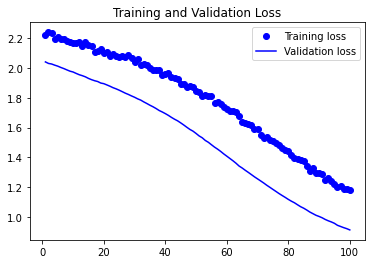

In [86]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [90]:
yhat = np.argmax(model.predict(X_train), axis=1)
y_actual = np.argmax(y_train, axis=1)
print(np.count_nonzero(yhat != y_actual)/len(yhat))

TypeError: object of type 'numpy.int64' has no len()

In [88]:
np.unique(yhat)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
yhat = model.predict(X_test)
yhat = np.argmax(yhat, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

print(accuracy_score(y_true, y_pred))

array([1, 2, 4, 6, 2, 3, 3, 7, 7, 5, 6, 2, 4, 5, 3, 1, 2, 7, 1, 5, 6, 2,
       2, 7, 1, 0, 7, 6, 1, 5, 2, 6, 2, 6, 1, 2, 6, 7, 7, 7, 2, 2, 7, 7,
       6, 0, 2, 6, 5, 0, 1, 0, 5, 3, 2, 2, 5, 6, 7, 7, 7, 7, 2, 6, 3, 6,
       5, 5, 3, 3, 0, 2, 0, 4, 7, 0, 2, 0, 0, 2, 1, 2, 7, 5, 0, 5, 2, 1,
       1, 3, 3, 4, 1, 0, 6, 7, 6, 2, 5, 3, 1, 2, 1, 1, 2, 7, 6, 7, 6, 6,
       7, 2, 7, 2, 6, 0, 2, 2, 6, 2, 2, 3, 2, 6, 0, 7, 0, 2, 5, 6, 7, 1,
       5, 6, 6, 5, 2, 2, 4, 6, 7, 5, 2, 2, 0, 2, 5, 1, 7, 2, 2, 6, 5, 5,
       5, 0, 6, 3, 4, 7, 7, 4, 6, 5, 5, 1, 1, 6, 4, 0, 3, 1, 5, 1, 5, 7,
       7, 6, 1, 1, 3, 7, 7, 1, 3, 0, 7, 5, 5, 0, 0, 2, 6, 2, 1, 1, 4, 3,
       2, 5, 2, 7, 2, 0, 6, 7, 7, 1, 2, 5, 5, 6, 0, 4, 2, 6, 3, 0, 3, 1,
       4, 6, 2, 7, 1, 1, 0, 6, 5, 6, 4, 5, 7, 5, 1, 5, 6, 0, 2, 6, 0, 0,
       6, 2, 0, 5, 2, 5, 3, 5, 1, 6, 5, 5, 2, 6, 2, 4, 2, 0, 1, 3, 2, 7,
       3, 3, 6, 5, 1, 7, 5, 1, 4, 0, 7, 0, 7, 7, 2, 0, 5, 1, 4, 4, 2, 6,
       0, 0, 4, 5, 0, 2, 2, 0, 4, 1, 3, 0, 1, 1, 6,

In [98]:
y_pred = [0, 2, 1, 3, 5]
y_true = [0, 1, 2, 3, 5]
print(accuracy_score(y_true, y_pred))


0.6
